# CSI 4142 : F1 Engine Performance Project

### 1.Reference Document

> [Project Plan](https://docs.google.com/spreadsheets/d/1MfZ_uWyq5k1WNh2hdbd9T7jhoByZJO3L/edit?usp=sharing&ouid=111189071097712478456&rtpof=true&sd=true)

> [Delivrable 2](https://docs.google.com/document/d/1QaYq-9d9uC2lt160PFkPMVZOqoBR38ypDO2FrSrDs9s/edit?usp=sharing)


> [Dataset Schema](https://drawsql.app/teams/hee-1/diagrams/f1)







# 1. General Information

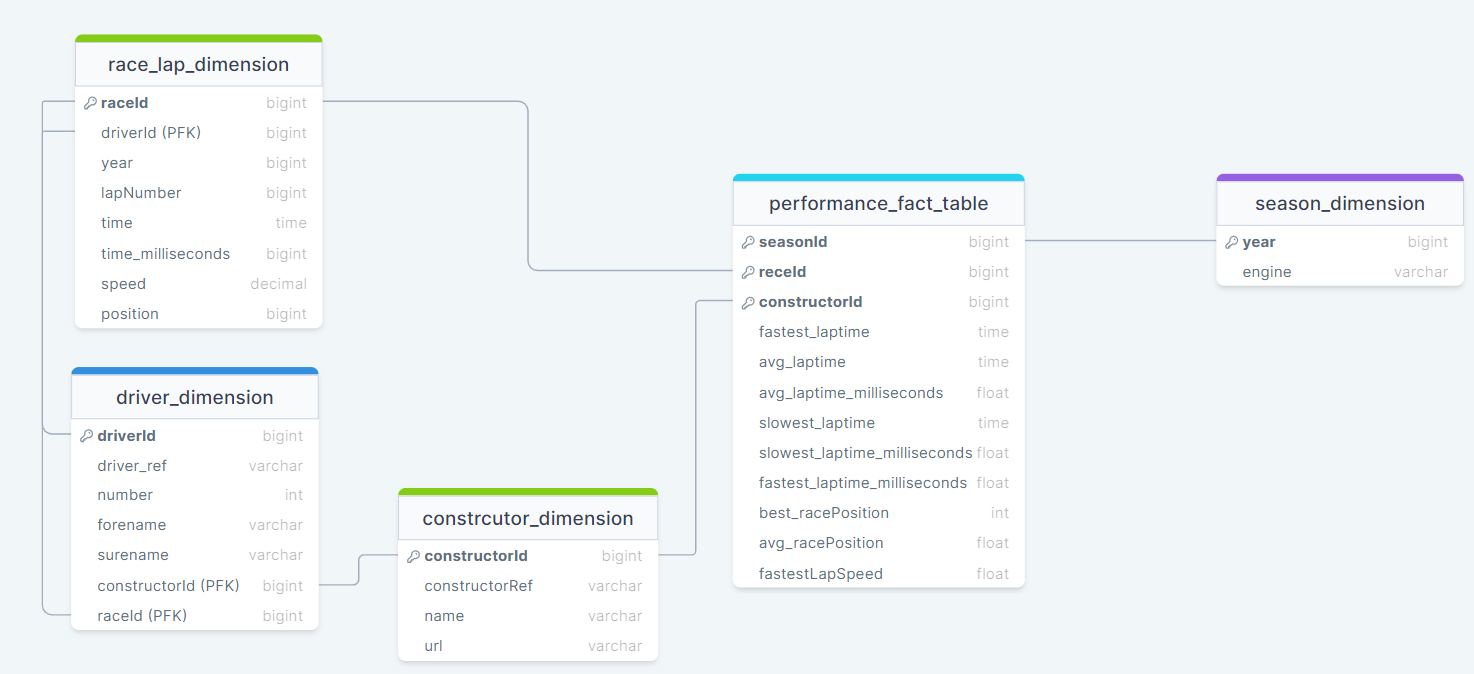

### 1.2. Tips and useful panda commands


*   `df = pd.read_csv('path_to_your_file.csv')` : Use to read the csv file
*   `df` : display the content of the dataframe
*   `print(df.dtypes)` : Print a Series with the data type of each column
*   `df.head(5)` : only display the first 5 element of the dataframe





# 1. Upload Datasets from your drive

In [ ]:
!pip install google-auth
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 1.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.1 which is incompatible.


In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Check if Colab has now access to your Drive

In [ ]:
!ls '/content/drive/My Drive'

Dataset  PROCURATION.doc  PROCURATION.docx


# 2. Data Test and Panda initilization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Testing with a constructor_result.csv file to make sure that ***panda*** was correctly imported and files are accessible

**Note**: Don't forget to create a Dataset folder in your google Drive and to upload the different datasets in there

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Dataset/constructor_results.csv')
df


,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N
...,...,...,...,...,...
12285,16785,1110,214,10.0,\N
12286,16786,1110,213,1.0,\N
12287,16787,1110,51,0.0,\N
12288,16788,1110,3,0.0,\N


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Dataset/constructors.csv')
df

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


# 3. Dataset Loading


In [ ]:
races = pd.read_csv('/content/drive/My Drive/Dataset/races.csv')
results = pd.read_csv('/content/drive/My Drive/Dataset/results.csv')
lap_times = pd.read_csv('/content/drive/My Drive/Dataset/lap_times.csv')
drivers = pd.read_csv('/content/drive/My Drive/Dataset/drivers.csv', encoding = 'utf-8')
constructors = pd.read_csv('/content/drive/My Drive/Dataset/constructors.csv')
circuits = pd.read_csv('/content/drive/My Drive/Dataset/circuits.csv')
seasons = pd.read_csv('/content/drive/My Drive/Dataset/seasons.csv')
constructor_results = pd.read_csv('/content/drive/My Drive/Dataset/constructor_results.csv')
sprint_results = pd.read_csv('/content/drive/My Drive/Dataset/sprint_results.csv')
print("RACES")
print("-----------------------")
print(races.dtypes)
print("-----------------------")
print("RESULTS")
print("-----------------------")
print(results.dtypes)
print("-----------------------")
print("LAP TIMES")
print("-----------------------")
print(lap_times.dtypes)
print("-----------------------")
print("DRIVERS")
print("-----------------------")
print(drivers.dtypes)
print("-----------------------")
print("CONSTRUCTORS")
print("-----------------------")
print(constructors.dtypes)
print("-----------------------")
print("CONSTRUCTOR RESULTS")
print("-----------------------")
print(constructor_results.dtypes)
print("-----------------------")
print("SPRINT RESULTS")
print("-----------------------")
print(sprint_results.dtypes)

RACES
-----------------------
raceId          int64
year            int64
round           int64
circuitId       int64
name           object
date           object
time           object
url            object
fp1_date       object
fp1_time       object
fp2_date       object
fp2_time       object
fp3_date       object
fp3_time       object
quali_date     object
quali_time     object
sprint_date    object
sprint_time    object
dtype: object
-----------------------
RESULTS
-----------------------
resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
dtype: object
----

Let's see what cunstructors have the most races

In [ ]:
constructors_count = results['constructorId'].value_counts()
constructors_count

constructorId
6      2371
1      1855
3      1609
25      881
32      871
       ... 
96        1
93        1
153       1
84        1
123       1
Name: count, Length: 210, dtype: int64

In [ ]:
constructor1 = constructors[constructors['constructorId'] == 6].name
print("constructor 1: " + constructor1)
constructor2 = constructors[constructors['constructorId'] == 1].name
print("constructor 2: " + constructor2)
constructor3 = constructors[constructors['constructorId'] == 131].name
print("constructor 3: " + constructor3)

5    constructor 1: Ferrari
Name: name, dtype: object
0    constructor 2: McLaren
Name: name, dtype: object
129    constructor 3: Mercedes
Name: name, dtype: object


In [ ]:
results[results['constructorId'] == 6].describe()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId
count,2371.000000,2371.000000,2371.000000,2371.0,2371.000000,2371.000000,2371.000000,2371.000000,2371.000000
mean,13859.975538,570.042176,232.389709,6.0,6.273302,8.338676,4.343429,51.529734,10.210881
std,7722.387634,313.325792,256.332094,0.0,4.783538,6.965347,5.375949,24.765198,21.033654
min,8.000000,1.000000,4.000000,6.0,0.000000,1.000000,0.000000,0.000000,1.000000
25%,6793.500000,297.000000,22.000000,6.0,3.000000,3.000000,0.000000,36.000000,1.000000
50%,15368.000000,598.000000,117.000000,6.0,5.000000,6.000000,3.000000,56.000000,1.000000
75%,19985.000000,818.500000,385.000000,6.0,8.000000,13.000000,8.000000,70.000000,11.000000
max,26084.000000,1110.000000,844.000000,6.0,31.000000,33.000000,26.000000,110.000000,135.000000


In [ ]:
race_info_df = pd.merge(races, results[['raceId', 'laps']], on='raceId', how='left')
race_info_df

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,laps
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,58.0
1,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,58.0
2,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,58.0
3,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,58.0
4,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26085,1116,2023,18,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00,NaN
26086,1117,2023,19,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N,NaN
26087,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00,NaN
26088,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N,NaN


In [ ]:
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,44,+1:43.071,5053521,25,15,1:50.994,227.169,1
26076,26082,1110,858,3,2,18,17,17,17,0.0,44,+1:44.476,5054926,37,9,1:50.486,228.213,1
26077,26083,1110,807,210,27,0,18,18,18,0.0,44,+1:50.450,5060900,26,4,1:49.907,229.415,1
26078,26084,1110,832,6,55,4,\N,R,19,0.0,23,\N,\N,9,19,1:53.138,222.864,130


# 4. Dimensions Staging

### race_lap_dimenension

Let's sort races by year and laps by raceId

In [ ]:
races = races.sort_values(by = "year")
laps = lap_times.sort_values(by = "raceId")
races.head(100)

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
838,839,1950,7,14,Italian Grand Prix,1950-09-03,\N,http://en.wikipedia.org/wiki/1950_Italian_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
837,838,1950,6,55,French Grand Prix,1950-07-02,\N,http://en.wikipedia.org/wiki/1950_French_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
836,837,1950,5,13,Belgian Grand Prix,1950-06-18,\N,http://en.wikipedia.org/wiki/1950_Belgian_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
835,836,1950,4,66,Swiss Grand Prix,1950-06-04,\N,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
834,835,1950,3,19,Indianapolis 500,1950-05-30,\N,http://en.wikipedia.org/wiki/1950_Indianapolis...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,745,1961,8,46,United States Grand Prix,1961-10-08,\N,http://en.wikipedia.org/wiki/1961_United_State...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
741,742,1961,5,58,British Grand Prix,1961-07-15,\N,http://en.wikipedia.org/wiki/1961_British_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
740,741,1961,4,55,French Grand Prix,1961-07-02,\N,http://en.wikipedia.org/wiki/1961_French_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
738,739,1961,2,39,Dutch Grand Prix,1961-05-22,\N,http://en.wikipedia.org/wiki/1961_Dutch_Grand_...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [ ]:
laps.head(100)

,raceId,driverId,lap,position,time,milliseconds
342881,1,1,1,13,1:49.088,109088
343543,1,20,21,2,1:46.868,106868
343544,1,20,22,2,2:38.375,158375
343545,1,20,23,2,2:31.909,151909
343546,1,20,24,2,2:22.185,142185
...,...,...,...,...,...,...
343575,1,20,53,2,1:29.721,89721
343576,1,20,54,2,1:30.237,90237
343577,1,20,55,2,1:31.092,91092
343578,1,20,56,7,2:40.783,160783


We keep only relevent columns of the races df

In [ ]:
races = races.loc[:, ['raceId', 'year', 'name']]
#we can also use race.drop(labels=['year', 'round',	'circuitId',	'date',	'time', etc...], axis=1) but it's too long to type....
races

,raceId,year,name
838,839,1950,Italian Grand Prix
837,838,1950,French Grand Prix
836,837,1950,Belgian Grand Prix
835,836,1950,Swiss Grand Prix
834,835,1950,Indianapolis 500
...,...,...,...
1080,1099,2023,Saudi Arabian Grand Prix
1079,1098,2023,Bahrain Grand Prix
1099,1119,2023,Las Vegas Grand Prix
1088,1108,2023,British Grand Prix


Let's check if our df contains null data

In [ ]:
races.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1101 entries, 838 to 1100
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   raceId  1101 non-null   int64 
 1   year    1101 non-null   int64 
 2   name    1101 non-null   object
dtypes: int64(2), object(1)
memory usage: 66.7+ KB


We notice that our df has no null data. All 1101 entrie are present.

We do the same with lap dimension

In [ ]:
lap_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551742 entries, 0 to 551741
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        551742 non-null  int64 
 1   driverId      551742 non-null  int64 
 2   lap           551742 non-null  int64 
 3   position      551742 non-null  int64 
 4   time          551742 non-null  object
 5   milliseconds  551742 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 25.3+ MB


We also have no missing values in the laps dimension

Let's rename the columns in the lap df to match our dimensional model

In [ ]:
lap_times = lap_times.rename(mapper={'lap': 'lap_number','milliseconds': 'time_milliseconds'}, axis=1)
lap_times.head(10)

,raceId,driverId,lap_number,position,time,time_milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
5,841,20,6,1,1:32.605,92605
6,841,20,7,1,1:32.502,92502
7,841,20,8,1,1:32.537,92537
8,841,20,9,1,1:33.240,93240
9,841,20,10,1,1:32.572,92572


**Note**: We noticed our lap_times dataset doesn't contain informations of speed/lap so we decided to drop that column from our race_lap_dimension

Let's change the time column type to timeDelta. This will allow us to be able to do calcultions on the time data

Let's clean the time column first

In [ ]:
lap_times['time'].isnull().sum()

0

In [ ]:
lap_times['time'] = lap_times['time'].astype(str).str.replace(',', '.')

In [ ]:
invalid_times = lap_times[~lap_times['time'].str.contains(':', regex=True)]
invalid_times.head()

,raceId,driverId,lap_number,position,time,time_milliseconds


Standardising the time format

In [ ]:
import re
lap_times['time'] = lap_times['time'].apply(lambda x: f'00:0{x}' if re.match(r'\d{1}:\d{2}\.\d{3}',x) else x).astype(str).str.strip()
lap_times['time'] = lap_times['time'].apply(lambda x: f'00:{x}' if re.match(r'\d{2}:\d{2}\.\d{3}',x) else x).astype(str).str.strip()
lap_times['time'] = lap_times['time'].apply(lambda x: f'0{x}' if re.match(r'\d{1}\:\d{2}\:\d{2}\.\d{3}',x) else x).astype(str).str.strip()
lap_times

,raceId,driverId,lap_number,position,time,time_milliseconds
0,841,20,1,1,00:01:38.109,98109
1,841,20,2,1,00:01:33.006,93006
2,841,20,3,1,00:01:32.713,92713
3,841,20,4,1,00:01:32.803,92803
4,841,20,5,1,00:01:32.342,92342
...,...,...,...,...,...,...
551737,1110,817,40,17,00:01:54.361,114361
551738,1110,817,41,17,00:01:53.367,113367
551739,1110,817,42,16,00:01:55.247,115247
551740,1110,817,43,16,00:01:52.115,112115


Checking for anomalies

In [ ]:
filtered_df = lap_times[~lap_times['time'].str.match(r'^\d{2}\:\d{2}:\d{2}\.\d{3}$')]
filtered_df

,raceId,driverId,lap_number,position,time,time_milliseconds


In [ ]:
def to_timedelta(s):
    h,m,seconds = s.split(':')
    seconds, milli = seconds.split('.', maxsplit=1)
    return pd.Timedelta(hours=int(h), minutes=int(m), seconds=int(seconds), milliseconds=int(milli))#+ str(0)

test

In [ ]:
to_timedelta(lap_times['time'][1])

Timedelta('0 days 00:01:33.006000')

In [ ]:
lap_times['time'] =  lap_times['time'].apply(to_timedelta)
lap_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551742 entries, 0 to 551741
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   raceId             551742 non-null  int64          
 1   driverId           551742 non-null  int64          
 2   lap_number         551742 non-null  int64          
 3   position           551742 non-null  int64          
 4   time               551742 non-null  timedelta64[ns]
 5   time_milliseconds  551742 non-null  int64          
dtypes: int64(5), timedelta64[ns](1)
memory usage: 25.3 MB


Now let us join our race df and our lap_times df to create our dimension

In [ ]:
lap_times = lap_times.loc[:, ['raceId', 'driverId', 'lap_number','position', 'time', 'time_milliseconds']]
lap_times

,raceId,driverId,lap_number,position,time,time_milliseconds
0,841,20,1,1,0 days 00:01:38.109000,98109
1,841,20,2,1,0 days 00:01:33.006000,93006
2,841,20,3,1,0 days 00:01:32.713000,92713
3,841,20,4,1,0 days 00:01:32.803000,92803
4,841,20,5,1,0 days 00:01:32.342000,92342
...,...,...,...,...,...,...
551737,1110,817,40,17,0 days 00:01:54.361000,114361
551738,1110,817,41,17,0 days 00:01:53.367000,113367
551739,1110,817,42,16,0 days 00:01:55.247000,115247
551740,1110,817,43,16,0 days 00:01:52.115000,112115


In [ ]:
race_lap_dimension  = races.merge(lap_times, on='raceId')
race_lap_dimension

,raceId,year,name,driverId,lap_number,position,time,time_milliseconds
0,224,1996,Australian Grand Prix,30,1,4,0 days 00:01:45.188000,105188
1,224,1996,Australian Grand Prix,30,2,3,0 days 00:01:37.680000,97680
2,224,1996,Australian Grand Prix,30,3,3,0 days 00:01:35.759000,95759
3,224,1996,Australian Grand Prix,30,4,3,0 days 00:01:35.467000,95467
4,224,1996,Australian Grand Prix,30,5,3,0 days 00:01:35.254000,95254
...,...,...,...,...,...,...,...,...
551737,1108,2023,British Grand Prix,825,27,16,0 days 00:01:33.935000,93935
551738,1108,2023,British Grand Prix,825,28,15,0 days 00:01:33.760000,93760
551739,1108,2023,British Grand Prix,825,29,15,0 days 00:01:33.356000,93356
551740,1108,2023,British Grand Prix,825,30,14,0 days 00:01:33.466000,93466


**We noticed that our dataset is missing values from years 1950 to 1995. still, this doesn't affect the purpose of our project**

In [ ]:
race_lap_dimension.head(50)

,raceId,year,name,driverId,lap_number,position,time,time_milliseconds
0,224,1996,Australian Grand Prix,30,1,4,0 days 00:01:45.188000,105188
1,224,1996,Australian Grand Prix,30,2,3,0 days 00:01:37.680000,97680
2,224,1996,Australian Grand Prix,30,3,3,0 days 00:01:35.759000,95759
3,224,1996,Australian Grand Prix,30,4,3,0 days 00:01:35.467000,95467
4,224,1996,Australian Grand Prix,30,5,3,0 days 00:01:35.254000,95254
5,224,1996,Australian Grand Prix,30,6,3,0 days 00:01:35.117000,95117
6,224,1996,Australian Grand Prix,30,7,3,0 days 00:01:35.023000,95023
7,224,1996,Australian Grand Prix,30,8,3,0 days 00:01:35.407000,95407
8,224,1996,Australian Grand Prix,30,9,3,0 days 00:01:35.198000,95198
9,224,1996,Australian Grand Prix,30,10,3,0 days 00:01:35.088000,95088


In [ ]:
race_lap_dimension = race_lap_dimension.sort_values(by='year', ascending=True)
race_lap_dimension

,raceId,year,name,driverId,lap_number,position,time,time_milliseconds
0,224,1996,Australian Grand Prix,30,1,4,0 days 00:01:45.188000,105188
9614,234,1996,German Grand Prix,14,20,7,0 days 00:01:49.568000,109568
9615,234,1996,German Grand Prix,14,21,6,0 days 00:01:48.693000,108693
9616,234,1996,German Grand Prix,14,22,6,0 days 00:01:48.228000,108228
9617,234,1996,German Grand Prix,14,23,4,0 days 00:01:47.907000,107907
...,...,...,...,...,...,...,...,...
542664,1107,2023,Austrian Grand Prix,855,31,14,0 days 00:01:11.779000,71779
542665,1107,2023,Austrian Grand Prix,855,32,14,0 days 00:01:11.643000,71643
542666,1107,2023,Austrian Grand Prix,855,33,14,0 days 00:01:11.503000,71503
542668,1107,2023,Austrian Grand Prix,855,35,14,0 days 00:01:11.641000,71641


### constructor_dimension

In [ ]:
constructors =  constructors.sort_values(by='name')
constructors

,constructorId,constructorRef,name,nationality,url
145,147,afm,AFM,German,http://en.wikipedia.org/wiki/Alex_von_Falkenha...
38,39,ags,AGS,French,http://en.wikipedia.org/wiki/Automobiles_Gonfa...
52,54,ats,ATS,Italian,http://en.wikipedia.org/wiki/ATS_(wheels)
159,161,adams,Adams,American,http://en.wikipedia.org/wiki/Adams_(constructor)
49,51,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...
...,...,...,...,...,...
105,107,watson,Watson,American,http://en.wikipedia.org/wiki/A.J._Watson
158,160,wetteroth,Wetteroth,American,http://en.wikipedia.org/wiki/Wetteroth
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
57,59,wolf,Wolf,Canadian,http://en.wikipedia.org/wiki/Walter_Wolf_Racing


Let's remove unecessary columns

In [ ]:
constructors = constructors.drop(labels=['nationality', 'url'], axis=1)
constructors

,constructorId,constructorRef,name
145,147,afm,AFM
38,39,ags,AGS
52,54,ats,ATS
159,161,adams,Adams
49,51,alfa,Alfa Romeo
...,...,...,...
105,107,watson,Watson
158,160,wetteroth,Wetteroth
2,3,williams,Williams
57,59,wolf,Wolf


Let's check if we have missing values

In [ ]:
constructors['constructorRef'] = constructors['constructorRef'].astype(str).str.strip()
constructors['name'] = constructors['name'].astype(str).str.strip()
constructors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211 entries, 145 to 47
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.6+ KB


We seem to have all the values we need.

Let's get the constructors by race

In [ ]:
constructor_dimension = constructors
constructor_dimension

,constructorId,constructorRef,name
145,147,afm,AFM
38,39,ags,AGS
52,54,ats,ATS
159,161,adams,Adams
49,51,alfa,Alfa Romeo
...,...,...,...
105,107,watson,Watson
158,160,wetteroth,Wetteroth
2,3,williams,Williams
57,59,wolf,Wolf


In [ ]:
constructor_dimension.drop_duplicates(inplace=True)
constructor_dimension

,constructorId,constructorRef,name
145,147,afm,AFM
38,39,ags,AGS
52,54,ats,ATS
159,161,adams,Adams
49,51,alfa,Alfa Romeo
...,...,...,...
105,107,watson,Watson
158,160,wetteroth,Wetteroth
2,3,williams,Williams
57,59,wolf,Wolf


### season_dimension

Let's remove unecessary columns

In [ ]:
seasons = seasons.drop(labels=['url'], axis=1).sort_values(by='year')
seasons

,year
60,1950
59,1951
58,1952
57,1953
56,1954
...,...
69,2019
70,2020
71,2021
72,2022


Let's check if we have missing values

In [ ]:
seasons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 60 to 73
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    74 non-null     int64
dtypes: int64(1)
memory usage: 1.2 KB


Let's add the engine column.



In [ ]:
engine_specs = []

for year in seasons['year']:
    if year < 1966:
        engine_specs.append('1.5L')
    elif 1966 <= year <= 1986:
        engine_specs.append('3.0L')
    elif 1987 <= year <= 1988:
        engine_specs.append('1.5L Turbo')
    elif 1989 <= year <= 1994:
        engine_specs.append('3.5L')
    elif 1995 <= year <= 2005:
        engine_specs.append('3.0L V10')
    elif 2006 <= year <= 2013:
        engine_specs.append('2.4L V8')
    else:  # From 2014 onwards
        engine_specs.append('1.6L V6 Turbo Hybrid')

# Creating the DataFrame
season_dimension = pd.DataFrame({
    'year': seasons['year'],
    'engine': engine_specs
})

season_dimension

,year,engine
60,1950,1.5L
59,1951,1.5L
58,1952,1.5L
57,1953,1.5L
56,1954,1.5L
...,...,...
69,2019,1.6L V6 Turbo Hybrid
70,2020,1.6L V6 Turbo Hybrid
71,2021,1.6L V6 Turbo Hybrid
72,2022,1.6L V6 Turbo Hybrid


### driver_dimension

In [ ]:
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Zhou_Guanyu
854,856,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri


In [ ]:
drivers_constructors = results.loc[:, ['driverId', 'constructorId', 'raceId']]
drivers_constructors.drop_duplicates(inplace=True)
drivers_constructors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26006 entries, 0 to 26079
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   driverId       26006 non-null  int64
 1   constructorId  26006 non-null  int64
 2   raceId         26006 non-null  int64
dtypes: int64(3)
memory usage: 812.7 KB


Let's remove unecessary columns

In [ ]:
drivers_col_selected= drivers.drop(labels=['code', 'nationality', 'dob', 'url'], axis=1)

driver = drivers_col_selected

drivers_col_selected

,driverId,driverRef,number,forename,surname
0,1,hamilton,44,Lewis,Hamilton
1,2,heidfeld,\N,Nick,Heidfeld
2,3,rosberg,6,Nico,Rosberg
3,4,alonso,14,Fernando,Alonso
4,5,kovalainen,\N,Heikki,Kovalainen
...,...,...,...,...,...
852,854,mick_schumacher,47,Mick,Schumacher
853,855,zhou,24,Guanyu,Zhou
854,856,de_vries,21,Nyck,de Vries
855,857,piastri,81,Oscar,Piastri


In [ ]:
drivers_col_selected = drivers_col_selected.merge(drivers_constructors, on='driverId')
drivers_col_selected

,driverId,driverRef,number,forename,surname,constructorId,raceId
0,1,hamilton,44,Lewis,Hamilton,1,18
1,1,hamilton,44,Lewis,Hamilton,1,19
2,1,hamilton,44,Lewis,Hamilton,1,20
3,1,hamilton,44,Lewis,Hamilton,1,21
4,1,hamilton,44,Lewis,Hamilton,1,22
...,...,...,...,...,...,...,...
26001,858,sargeant,2,Logan,Sargeant,3,1106
26002,858,sargeant,2,Logan,Sargeant,3,1107
26003,858,sargeant,2,Logan,Sargeant,3,1108
26004,858,sargeant,2,Logan,Sargeant,3,1109


In [ ]:
drivers_col_selected.drop_duplicates(inplace=True)
drivers_col_selected

,driverId,driverRef,number,forename,surname,constructorId,raceId
0,1,hamilton,44,Lewis,Hamilton,1,18
1,1,hamilton,44,Lewis,Hamilton,1,19
2,1,hamilton,44,Lewis,Hamilton,1,20
3,1,hamilton,44,Lewis,Hamilton,1,21
4,1,hamilton,44,Lewis,Hamilton,1,22
...,...,...,...,...,...,...,...
26001,858,sargeant,2,Logan,Sargeant,3,1106
26002,858,sargeant,2,Logan,Sargeant,3,1107
26003,858,sargeant,2,Logan,Sargeant,3,1108
26004,858,sargeant,2,Logan,Sargeant,3,1109


We're going to drop the "number" column because it has too many null values

In [ ]:
drivers_dimension= drivers_col_selected.drop(labels=['number'], axis=1)
drivers_dimension

,driverId,driverRef,forename,surname,constructorId,raceId
0,1,hamilton,Lewis,Hamilton,1,18
1,1,hamilton,Lewis,Hamilton,1,19
2,1,hamilton,Lewis,Hamilton,1,20
3,1,hamilton,Lewis,Hamilton,1,21
4,1,hamilton,Lewis,Hamilton,1,22
...,...,...,...,...,...,...
26001,858,sargeant,Logan,Sargeant,3,1106
26002,858,sargeant,Logan,Sargeant,3,1107
26003,858,sargeant,Logan,Sargeant,3,1108
26004,858,sargeant,Logan,Sargeant,3,1109


In [ ]:
Alonso_count = drivers_dimension[drivers_dimension['surname'] == 'Alonso']
Alonso_count

,driverId,driverRef,forename,surname,constructorId,raceId
712,4,alonso,Fernando,Alonso,4,18
713,4,alonso,Fernando,Alonso,4,19
714,4,alonso,Fernando,Alonso,4,20
715,4,alonso,Fernando,Alonso,4,21
716,4,alonso,Fernando,Alonso,4,22
...,...,...,...,...,...,...
1077,4,alonso,Fernando,Alonso,117,1106
1078,4,alonso,Fernando,Alonso,117,1107
1079,4,alonso,Fernando,Alonso,117,1108
1080,4,alonso,Fernando,Alonso,117,1109


Let's check if we have missing values

In [ ]:
drivers_dimension.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26006 entries, 0 to 26005
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   driverId       26006 non-null  int64 
 1   driverRef      26006 non-null  object
 2   forename       26006 non-null  object
 3   surname        26006 non-null  object
 4   constructorId  26006 non-null  int64 
 5   raceId         26006 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.2+ MB


In [ ]:
drivers_dimension['driver_name'] = drivers_dimension['forename'].str.cat(drivers_dimension['surname'],sep=" ")
drivers_dimension.drop(columns=['forename', 'surname'], inplace=True)
drivers_dimension

,driverId,driverRef,constructorId,raceId,driver_name
0,1,hamilton,1,18,Lewis Hamilton
1,1,hamilton,1,19,Lewis Hamilton
2,1,hamilton,1,20,Lewis Hamilton
3,1,hamilton,1,21,Lewis Hamilton
4,1,hamilton,1,22,Lewis Hamilton
...,...,...,...,...,...
26001,858,sargeant,3,1106,Logan Sargeant
26002,858,sargeant,3,1107,Logan Sargeant
26003,858,sargeant,3,1108,Logan Sargeant
26004,858,sargeant,3,1109,Logan Sargeant


### 6. Other changes

add the constructor ID in the races_lap_dimension

In [ ]:
temp = pd.merge(season_dimension, race_lap_dimension, on='year')
temp = temp.rename(mapper={'year': 'seasonId'}, axis=1)
temp

,seasonId,engine,raceId,name,driverId,lap_number,position,time,time_milliseconds
0,1996,3.0L V10,224,Australian Grand Prix,30,1,4,0 days 00:01:45.188000,105188
1,1996,3.0L V10,234,German Grand Prix,14,20,7,0 days 00:01:49.568000,109568
2,1996,3.0L V10,234,German Grand Prix,14,21,6,0 days 00:01:48.693000,108693
3,1996,3.0L V10,234,German Grand Prix,14,22,6,0 days 00:01:48.228000,108228
4,1996,3.0L V10,234,German Grand Prix,14,23,4,0 days 00:01:47.907000,107907
...,...,...,...,...,...,...,...,...,...
551737,2023,1.6L V6 Turbo Hybrid,1107,Austrian Grand Prix,855,31,14,0 days 00:01:11.779000,71779
551738,2023,1.6L V6 Turbo Hybrid,1107,Austrian Grand Prix,855,32,14,0 days 00:01:11.643000,71643
551739,2023,1.6L V6 Turbo Hybrid,1107,Austrian Grand Prix,855,33,14,0 days 00:01:11.503000,71503
551740,2023,1.6L V6 Turbo Hybrid,1107,Austrian Grand Prix,855,35,14,0 days 00:01:11.641000,71641


In [ ]:
temp = pd.merge(temp, drivers_dimension, on=['raceId','driverId'])
temp

,seasonId,engine,raceId,name,driverId,lap_number,position,time,time_milliseconds,driverRef,constructorId,driver_name
0,1996,3.0L V10,224,Australian Grand Prix,30,1,4,0 days 00:01:45.188000,105188,michael_schumacher,6,Michael Schumacher
1,1996,3.0L V10,234,German Grand Prix,14,20,7,0 days 00:01:49.568000,109568,coulthard,1,David Coulthard
2,1996,3.0L V10,234,German Grand Prix,14,21,6,0 days 00:01:48.693000,108693,coulthard,1,David Coulthard
3,1996,3.0L V10,234,German Grand Prix,14,22,6,0 days 00:01:48.228000,108228,coulthard,1,David Coulthard
4,1996,3.0L V10,234,German Grand Prix,14,23,4,0 days 00:01:47.907000,107907,coulthard,1,David Coulthard
...,...,...,...,...,...,...,...,...,...,...,...,...
551737,2023,1.6L V6 Turbo Hybrid,1107,Austrian Grand Prix,855,31,14,0 days 00:01:11.779000,71779,zhou,51,Guanyu Zhou
551738,2023,1.6L V6 Turbo Hybrid,1107,Austrian Grand Prix,855,32,14,0 days 00:01:11.643000,71643,zhou,51,Guanyu Zhou
551739,2023,1.6L V6 Turbo Hybrid,1107,Austrian Grand Prix,855,33,14,0 days 00:01:11.503000,71503,zhou,51,Guanyu Zhou
551740,2023,1.6L V6 Turbo Hybrid,1107,Austrian Grand Prix,855,35,14,0 days 00:01:11.641000,71641,zhou,51,Guanyu Zhou


In [ ]:
duplicate_row = temp[temp.duplicated(subset=['raceId', 'driverId', 'lap_number'])]

# If there are any duplicate rows, print them
if len(duplicate_row) > 0:
    print("There are duplicate rows in the merged DataFrame:")
    duplicate_row
else:
    print("There are no duplicate rows in the merged DataFrame.")

There are no duplicate rows in the merged DataFrame.


In [ ]:
duplicate_row

,seasonId,engine,raceId,name,driverId,lap_number,position,time,time_milliseconds,driverRef,constructorId,driver_name


In [ ]:
temp = temp.reindex(columns=['seasonId', 'raceId', 'name', 'driverId', 'driverRef', 'driver_name', 'constructorId', 'lap_number', 'position', 'time', 'time_milliseconds'])

In [ ]:
temp.sort_values(by='seasonId')

,seasonId,raceId,name,driverId,driverRef,driver_name,constructorId,lap_number,position,time,time_milliseconds
0,1996,224,Australian Grand Prix,30,michael_schumacher,Michael Schumacher,6,1,4,0 days 00:01:45.188000,105188
9614,1996,224,Australian Grand Prix,30,michael_schumacher,Michael Schumacher,6,3,3,0 days 00:01:35.759000,95759
9615,1996,224,Australian Grand Prix,30,michael_schumacher,Michael Schumacher,6,4,3,0 days 00:01:35.467000,95467
9616,1996,224,Australian Grand Prix,30,michael_schumacher,Michael Schumacher,6,5,3,0 days 00:01:35.254000,95254
9617,1996,224,Australian Grand Prix,30,michael_schumacher,Michael Schumacher,6,6,3,0 days 00:01:35.117000,95117
...,...,...,...,...,...,...,...,...,...,...,...
542664,2023,1105,Spanish Grand Prix,855,zhou,Guanyu Zhou,51,37,15,0 days 00:01:39.856000,99856
542665,2023,1108,British Grand Prix,825,kevin_magnussen,Kevin Magnussen,210,20,17,0 days 00:01:33.935000,93935
542666,2023,1108,British Grand Prix,825,kevin_magnussen,Kevin Magnussen,210,7,20,0 days 00:01:34.950000,94950
542668,2023,1108,British Grand Prix,825,kevin_magnussen,Kevin Magnussen,210,5,20,0 days 00:01:34.598000,94598


# 5. Fact table

To be able to get some useful information from our dimensions, first we need to get what we need, as you know our grain is the performance of each constructor on each race between 2006 and 2021. So to get the performance data, we need to get a dataframe that contains all of these information and we are going to use the raceLapDimension

In [ ]:
Fact = temp.loc[:, ['seasonId', 'raceId', 'constructorId']]
Fact.drop_duplicates(inplace=True)
Fact

,seasonId,raceId,constructorId
0,1996,224,6
1,1996,234,1
56,1996,234,27
113,1996,234,3
141,1996,234,22
...,...,...,...
550306,2023,1107,3
550519,2023,1107,9
550679,2023,1107,6
550892,2023,1107,213


## Let's build the Facts

We group our temporary df by constructor and by race since that's the grain of our Fact table

In [ ]:
grouped = temp.groupby(['raceId', 'constructorId'])


### Fastest laptime

In [ ]:
fastest_laptime = grouped['time'].min()
fastest_laptime

raceId  constructorId
1       1               0 days 00:01:29.020000
        2               0 days 00:01:27.988000
        3               0 days 00:01:27.706000
        4               0 days 00:01:28.712000
        5               0 days 00:01:29.230000
                                 ...          
1110    117             0 days 00:01:50.938000
        131             0 days 00:01:47.305000
        210             0 days 00:01:49.907000
        213             0 days 00:01:50.994000
        214             0 days 00:01:50.439000
Name: time, Length: 5381, dtype: timedelta64[ns]

In [ ]:
Fact = Fact.merge(fastest_laptime, on=['raceId', 'constructorId'], how='left')
Fact.rename(columns={'time': 'fastest_laptime'}, inplace=True)
Fact

,seasonId,raceId,constructorId,fastest_laptime
0,1996,224,6,0 days 00:01:33.651000
1,1996,234,1,0 days 00:01:47.856000
2,1996,234,27,0 days 00:01:48.288000
3,1996,234,3,0 days 00:01:46.504000
4,1996,234,22,0 days 00:01:47.643000
...,...,...,...,...
5376,2023,1107,3,0 days 00:01:09.560000
5377,2023,1107,9,0 days 00:01:07.012000
5378,2023,1107,6,0 days 00:01:08.820000
5379,2023,1107,213,0 days 00:01:09.620000


### Average laptime

In [ ]:
avg_laptime = grouped['time'].mean()
avg_laptime

raceId  constructorId
1       1               0 days 00:01:37.563758620
        2               0 days 00:01:36.431035398
        3               0 days 00:01:36.299786666
        4               0 days 00:01:38.817524390
        5               0 days 00:01:37.619568965
                                   ...           
1110    117             0 days 00:01:54.050272727
        131             0 days 00:01:53.791727272
        210             0 days 00:01:54.921636363
        213             0 days 00:01:54.593090909
        214             0 days 00:01:54.303443181
Name: time, Length: 5381, dtype: timedelta64[ns]

In [ ]:
Fact = Fact.merge(avg_laptime, on=['raceId', 'constructorId'], how='left')
Fact.rename(columns={'time': 'avg_laptime'}, inplace=True)
Fact

,seasonId,raceId,constructorId,fastest_laptime,avg_laptime
0,1996,224,6,0 days 00:01:33.651000,0 days 00:01:37.941433333
1,1996,234,1,0 days 00:01:47.856000,0 days 00:01:49.922568965
2,1996,234,27,0 days 00:01:48.288000,0 days 00:01:51.177171875
3,1996,234,3,0 days 00:01:46.504000,0 days 00:01:49.341777777
4,1996,234,22,0 days 00:01:47.643000,0 days 00:01:49.099793103
...,...,...,...,...,...
5376,2023,1107,3,0 days 00:01:09.560000,0 days 00:01:13.428120567
5377,2023,1107,9,0 days 00:01:07.012000,0 days 00:01:12.425366197
5378,2023,1107,6,0 days 00:01:08.820000,0 days 00:01:12.491169014
5379,2023,1107,213,0 days 00:01:09.620000,0 days 00:01:13.869928571


### Average laptime in milliseconds

In [ ]:
avg_laptime_milliseconds = grouped['time_milliseconds'].mean().round(3)
avg_laptime_milliseconds

raceId  constructorId
1       1                 97563.759
        2                 96431.035
        3                 96299.787
        4                 98817.524
        5                 97619.569
                            ...    
1110    117              114050.273
        131              113791.727
        210              114921.636
        213              114593.091
        214              114303.443
Name: time_milliseconds, Length: 5381, dtype: float64

In [ ]:
Fact = Fact.merge(avg_laptime_milliseconds, on=['raceId', 'constructorId'], how='left')
Fact.rename(columns={'time_milliseconds': 'avg_laptime_milliseconds'}, inplace=True)
Fact

,seasonId,raceId,constructorId,fastest_laptime,avg_laptime,avg_laptime_milliseconds
0,1996,224,6,0 days 00:01:33.651000,0 days 00:01:37.941433333,97941.433
1,1996,234,1,0 days 00:01:47.856000,0 days 00:01:49.922568965,109922.569
2,1996,234,27,0 days 00:01:48.288000,0 days 00:01:51.177171875,111177.172
3,1996,234,3,0 days 00:01:46.504000,0 days 00:01:49.341777777,109341.778
4,1996,234,22,0 days 00:01:47.643000,0 days 00:01:49.099793103,109099.793
...,...,...,...,...,...,...
5376,2023,1107,3,0 days 00:01:09.560000,0 days 00:01:13.428120567,73428.121
5377,2023,1107,9,0 days 00:01:07.012000,0 days 00:01:12.425366197,72425.366
5378,2023,1107,6,0 days 00:01:08.820000,0 days 00:01:12.491169014,72491.169
5379,2023,1107,213,0 days 00:01:09.620000,0 days 00:01:13.869928571,73869.929


### Slowest laptime

In [ ]:
slowest_laptime = grouped['time'].max()
slowest_laptime

raceId  constructorId
1       1               0 days 00:02:33.309000
        2               0 days 00:02:37.754000
        3               0 days 00:02:35.699000
        4               0 days 00:02:35.582000
        5               0 days 00:02:35.605000
                                 ...          
1110    117             0 days 00:02:13.650000
        131             0 days 00:02:09.564000
        210             0 days 00:02:07.746000
        213             0 days 00:02:09.835000
        214             0 days 00:02:09.405000
Name: time, Length: 5381, dtype: timedelta64[ns]

In [ ]:
Fact = Fact.merge(slowest_laptime, on=['raceId', 'constructorId'], how='left')
Fact.rename(columns={'time': 'slowest_laptime'}, inplace=True)
Fact

,seasonId,raceId,constructorId,fastest_laptime,avg_laptime,avg_laptime_milliseconds,slowest_laptime
0,1996,224,6,0 days 00:01:33.651000,0 days 00:01:37.941433333,97941.433,0 days 00:03:02.162000
1,1996,234,1,0 days 00:01:47.856000,0 days 00:01:49.922568965,109922.569,0 days 00:02:05.234000
2,1996,234,27,0 days 00:01:48.288000,0 days 00:01:51.177171875,111177.172,0 days 00:02:11.795000
3,1996,234,3,0 days 00:01:46.504000,0 days 00:01:49.341777777,109341.778,0 days 00:02:10.504000
4,1996,234,22,0 days 00:01:47.643000,0 days 00:01:49.099793103,109099.793,0 days 00:02:09.427000
...,...,...,...,...,...,...,...
5376,2023,1107,3,0 days 00:01:09.560000,0 days 00:01:13.428120567,73428.121,0 days 00:01:59.986000
5377,2023,1107,9,0 days 00:01:07.012000,0 days 00:01:12.425366197,72425.366,0 days 00:02:04.721000
5378,2023,1107,6,0 days 00:01:08.820000,0 days 00:01:12.491169014,72491.169,0 days 00:02:03.609000
5379,2023,1107,213,0 days 00:01:09.620000,0 days 00:01:13.869928571,73869.929,0 days 00:02:02.360000


### Slowest laptime in milliseconds

In [ ]:
slowest_laptime_milliseconds = grouped['time_milliseconds'].max()
slowest_laptime_milliseconds

raceId  constructorId
1       1                153309
        2                157754
        3                155699
        4                155582
        5                155605
                          ...  
1110    117              133650
        131              129564
        210              127746
        213              129835
        214              129405
Name: time_milliseconds, Length: 5381, dtype: int64

In [ ]:
Fact = Fact.merge(slowest_laptime_milliseconds, on=['raceId', 'constructorId'], how='left')
Fact.rename(columns={'time_milliseconds': 'slowest_laptime_milliseconds'}, inplace=True)
Fact

,seasonId,raceId,constructorId,fastest_laptime,avg_laptime,avg_laptime_milliseconds,slowest_laptime,slowest_laptime_milliseconds
0,1996,224,6,0 days 00:01:33.651000,0 days 00:01:37.941433333,97941.433,0 days 00:03:02.162000,182162
1,1996,234,1,0 days 00:01:47.856000,0 days 00:01:49.922568965,109922.569,0 days 00:02:05.234000,125234
2,1996,234,27,0 days 00:01:48.288000,0 days 00:01:51.177171875,111177.172,0 days 00:02:11.795000,131795
3,1996,234,3,0 days 00:01:46.504000,0 days 00:01:49.341777777,109341.778,0 days 00:02:10.504000,130504
4,1996,234,22,0 days 00:01:47.643000,0 days 00:01:49.099793103,109099.793,0 days 00:02:09.427000,129427
...,...,...,...,...,...,...,...,...
5376,2023,1107,3,0 days 00:01:09.560000,0 days 00:01:13.428120567,73428.121,0 days 00:01:59.986000,119986
5377,2023,1107,9,0 days 00:01:07.012000,0 days 00:01:12.425366197,72425.366,0 days 00:02:04.721000,124721
5378,2023,1107,6,0 days 00:01:08.820000,0 days 00:01:12.491169014,72491.169,0 days 00:02:03.609000,123609
5379,2023,1107,213,0 days 00:01:09.620000,0 days 00:01:13.869928571,73869.929,0 days 00:02:02.360000,122360


### Fastest laptime in milliseconds

In [ ]:
fastest_laptime_milliseconds = grouped['time_milliseconds'].min()
fastest_laptime_milliseconds

raceId  constructorId
1       1                 89020
        2                 87988
        3                 87706
        4                 88712
        5                 89230
                          ...  
1110    117              110938
        131              107305
        210              109907
        213              110994
        214              110439
Name: time_milliseconds, Length: 5381, dtype: int64

In [ ]:
Fact = Fact.merge(fastest_laptime_milliseconds, on=['raceId', 'constructorId'], how='left')
Fact.rename(columns={'time_milliseconds': 'fastest_laptime_milliseconds'}, inplace=True)
Fact

,seasonId,raceId,constructorId,fastest_laptime,avg_laptime,avg_laptime_milliseconds,slowest_laptime,slowest_laptime_milliseconds,fastest_laptime_milliseconds
0,1996,224,6,0 days 00:01:33.651000,0 days 00:01:37.941433333,97941.433,0 days 00:03:02.162000,182162,93651
1,1996,234,1,0 days 00:01:47.856000,0 days 00:01:49.922568965,109922.569,0 days 00:02:05.234000,125234,107856
2,1996,234,27,0 days 00:01:48.288000,0 days 00:01:51.177171875,111177.172,0 days 00:02:11.795000,131795,108288
3,1996,234,3,0 days 00:01:46.504000,0 days 00:01:49.341777777,109341.778,0 days 00:02:10.504000,130504,106504
4,1996,234,22,0 days 00:01:47.643000,0 days 00:01:49.099793103,109099.793,0 days 00:02:09.427000,129427,107643
...,...,...,...,...,...,...,...,...,...
5376,2023,1107,3,0 days 00:01:09.560000,0 days 00:01:13.428120567,73428.121,0 days 00:01:59.986000,119986,69560
5377,2023,1107,9,0 days 00:01:07.012000,0 days 00:01:12.425366197,72425.366,0 days 00:02:04.721000,124721,67012
5378,2023,1107,6,0 days 00:01:08.820000,0 days 00:01:12.491169014,72491.169,0 days 00:02:03.609000,123609,68820
5379,2023,1107,213,0 days 00:01:09.620000,0 days 00:01:13.869928571,73869.929,0 days 00:02:02.360000,122360,69620


### Best position during the race

In [ ]:
best_racePosition = grouped['position'].min()
best_racePosition

raceId  constructorId
1       1                3
        2                3
        3                3
        4                3
        5                4
                        ..
1110    117              4
        131              3
        210              8
        213              6
        214              6
Name: position, Length: 5381, dtype: int64

In [ ]:
Fact = Fact.merge(best_racePosition, on=['raceId', 'constructorId'], how='left')
Fact.rename(columns={'position': 'best_racePosition'}, inplace=True)
Fact

,seasonId,raceId,constructorId,fastest_laptime,avg_laptime,avg_laptime_milliseconds,slowest_laptime,slowest_laptime_milliseconds,fastest_laptime_milliseconds,best_racePosition
0,1996,224,6,0 days 00:01:33.651000,0 days 00:01:37.941433333,97941.433,0 days 00:03:02.162000,182162,93651,3
1,1996,234,1,0 days 00:01:47.856000,0 days 00:01:49.922568965,109922.569,0 days 00:02:05.234000,125234,107856,4
2,1996,234,27,0 days 00:01:48.288000,0 days 00:01:51.177171875,111177.172,0 days 00:02:11.795000,131795,108288,7
3,1996,234,3,0 days 00:01:46.504000,0 days 00:01:49.341777777,109341.778,0 days 00:02:10.504000,130504,106504,1
4,1996,234,22,0 days 00:01:47.643000,0 days 00:01:49.099793103,109099.793,0 days 00:02:09.427000,129427,107643,1
...,...,...,...,...,...,...,...,...,...,...
5376,2023,1107,3,0 days 00:01:09.560000,0 days 00:01:13.428120567,73428.121,0 days 00:01:59.986000,119986,69560,9
5377,2023,1107,9,0 days 00:01:07.012000,0 days 00:01:12.425366197,72425.366,0 days 00:02:04.721000,124721,67012,1
5378,2023,1107,6,0 days 00:01:08.820000,0 days 00:01:12.491169014,72491.169,0 days 00:02:03.609000,123609,68820,1
5379,2023,1107,213,0 days 00:01:09.620000,0 days 00:01:13.869928571,73869.929,0 days 00:02:02.360000,122360,69620,8


### Average position during the race

In [ ]:
avg_racePosition = grouped['position'].mean().round(2)
avg_racePosition

raceId  constructorId
1       1                 9.67
        2                10.19
        3                 6.60
        4                 8.96
        5                11.42
                         ...  
1110    117               6.99
        131               5.55
        210              14.19
        213              12.14
        214              10.52
Name: position, Length: 5381, dtype: float64

In [ ]:
Fact = Fact.merge(avg_racePosition, on=['raceId', 'constructorId'], how='left')
Fact.rename(columns={'position': 'avg_racePosition'}, inplace=True)
Fact

,seasonId,raceId,constructorId,fastest_laptime,avg_laptime,avg_laptime_milliseconds,slowest_laptime,slowest_laptime_milliseconds,fastest_laptime_milliseconds,best_racePosition,avg_racePosition
0,1996,224,6,0 days 00:01:33.651000,0 days 00:01:37.941433333,97941.433,0 days 00:03:02.162000,182162,93651,3,3.56
1,1996,234,1,0 days 00:01:47.856000,0 days 00:01:49.922568965,109922.569,0 days 00:02:05.234000,125234,107856,4,5.88
2,1996,234,27,0 days 00:01:48.288000,0 days 00:01:51.177171875,111177.172,0 days 00:02:11.795000,131795,108288,7,11.16
3,1996,234,3,0 days 00:01:46.504000,0 days 00:01:49.341777777,109341.778,0 days 00:02:10.504000,130504,106504,1,3.59
4,1996,234,22,0 days 00:01:47.643000,0 days 00:01:49.099793103,109099.793,0 days 00:02:09.427000,129427,107643,1,1.87
...,...,...,...,...,...,...,...,...,...,...,...
5376,2023,1107,3,0 days 00:01:09.560000,0 days 00:01:13.428120567,73428.121,0 days 00:01:59.986000,119986,69560,9,12.12
5377,2023,1107,9,0 days 00:01:07.012000,0 days 00:01:12.425366197,72425.366,0 days 00:02:04.721000,124721,67012,1,3.63
5378,2023,1107,6,0 days 00:01:08.820000,0 days 00:01:12.491169014,72491.169,0 days 00:02:03.609000,123609,68820,1,2.61
5379,2023,1107,213,0 days 00:01:09.620000,0 days 00:01:13.869928571,73869.929,0 days 00:02:02.360000,122360,69620,8,16.31


### Worst race position

In [ ]:
worst_racePosition = grouped['position'].max()
worst_racePosition

raceId  constructorId
1       1                15
        2                17
        3                13
        4                15
        5                16
                         ..
1110    117              18
        131              15
        210              19
        213              19
        214              17
Name: position, Length: 5381, dtype: int64

In [ ]:
Fact = Fact.merge(worst_racePosition, on=['raceId', 'constructorId'], how='left')
Fact.rename(columns={'position': 'worst_racePosition'}, inplace=True)
Fact

,seasonId,raceId,constructorId,fastest_laptime,avg_laptime,avg_laptime_milliseconds,slowest_laptime,slowest_laptime_milliseconds,fastest_laptime_milliseconds,best_racePosition,avg_racePosition,worst_racePosition,worst_racePosition
0,1996,224,6,0 days 00:01:33.651000,0 days 00:01:37.941433333,97941.433,0 days 00:03:02.162000,182162,93651,3,3.56,9,9
1,1996,234,1,0 days 00:01:47.856000,0 days 00:01:49.922568965,109922.569,0 days 00:02:05.234000,125234,107856,4,5.88,8,8
2,1996,234,27,0 days 00:01:48.288000,0 days 00:01:51.177171875,111177.172,0 days 00:02:11.795000,131795,108288,7,11.16,18,18
3,1996,234,3,0 days 00:01:46.504000,0 days 00:01:49.341777777,109341.778,0 days 00:02:10.504000,130504,106504,1,3.59,6,6
4,1996,234,22,0 days 00:01:47.643000,0 days 00:01:49.099793103,109099.793,0 days 00:02:09.427000,129427,107643,1,1.87,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5376,2023,1107,3,0 days 00:01:09.560000,0 days 00:01:13.428120567,73428.121,0 days 00:01:59.986000,119986,69560,9,12.12,17,17
5377,2023,1107,9,0 days 00:01:07.012000,0 days 00:01:12.425366197,72425.366,0 days 00:02:04.721000,124721,67012,1,3.63,14,14
5378,2023,1107,6,0 days 00:01:08.820000,0 days 00:01:12.491169014,72491.169,0 days 00:02:03.609000,123609,68820,1,2.61,6,6
5379,2023,1107,213,0 days 00:01:09.620000,0 days 00:01:13.869928571,73869.929,0 days 00:02:02.360000,122360,69620,8,16.31,20,20


### Fastest lap speed

In [ ]:
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,44,+1:43.071,5053521,25,15,1:50.994,227.169,1
26076,26082,1110,858,3,2,18,17,17,17,0.0,44,+1:44.476,5054926,37,9,1:50.486,228.213,1
26077,26083,1110,807,210,27,0,18,18,18,0.0,44,+1:50.450,5060900,26,4,1:49.907,229.415,1
26078,26084,1110,832,6,55,4,\N,R,19,0.0,23,\N,\N,9,19,1:53.138,222.864,130


In [ ]:
enrich = pd.merge(Fact, results[['raceId', 'constructorId', 'fastestLapSpeed']],
                     on=['raceId', 'constructorId'], how='inner')
enrich

,seasonId,raceId,constructorId,fastest_laptime,avg_laptime,avg_laptime_milliseconds,slowest_laptime,slowest_laptime_milliseconds,fastest_laptime_milliseconds,best_racePosition,avg_racePosition,worst_racePosition,fastestLapSpeed
0,1996,224,6,0 days 00:01:33.651000,0 days 00:01:37.941433333,97941.433,0 days 00:03:02.162000,182162,93651,3,3.56,9,\N
1,1996,224,6,0 days 00:01:33.651000,0 days 00:01:37.941433333,97941.433,0 days 00:03:02.162000,182162,93651,3,3.56,9,\N
2,1996,234,1,0 days 00:01:47.856000,0 days 00:01:49.922568965,109922.569,0 days 00:02:05.234000,125234,107856,4,5.88,8,\N
3,1996,234,1,0 days 00:01:47.856000,0 days 00:01:49.922568965,109922.569,0 days 00:02:05.234000,125234,107856,4,5.88,8,\N
4,1996,234,27,0 days 00:01:48.288000,0 days 00:01:51.177171875,111177.172,0 days 00:02:11.795000,131795,108288,7,11.16,18,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10750,2023,1107,6,0 days 00:01:08.820000,0 days 00:01:12.491169014,72491.169,0 days 00:02:03.609000,123609,68820,1,2.61,6,224.934
10751,2023,1107,213,0 days 00:01:09.620000,0 days 00:01:13.869928571,73869.929,0 days 00:02:02.360000,122360,69620,8,16.31,20,222.507
10752,2023,1107,213,0 days 00:01:09.620000,0 days 00:01:13.869928571,73869.929,0 days 00:02:02.360000,122360,69620,8,16.31,20,221.511
10753,2023,1107,51,0 days 00:01:09.786000,0 days 00:01:13.818742857,73818.743,0 days 00:02:00.550000,120550,69786,10,16.00,20,222.714


Remove duplicates and keep the best because each constructor has 2 drivers

In [ ]:
performance_fact = enrich.loc[enrich.groupby(['seasonId', 'raceId', 'constructorId'])['fastestLapSpeed'].idxmax()]
performance_fact

,seasonId,raceId,constructorId,fastest_laptime,avg_laptime,avg_laptime_milliseconds,slowest_laptime,slowest_laptime_milliseconds,fastest_laptime_milliseconds,best_racePosition,avg_racePosition,worst_racePosition,fastestLapSpeed
226,1996,224,1,0 days 00:01:35.843000,0 days 00:01:38.301304878,98301.305,0 days 00:02:06.391000,126391,95843,4,7.94,19,\N
224,1996,224,3,0 days 00:01:33.421000,0 days 00:01:36.370706896,96370.707,0 days 00:02:09.739000,129739,93421,1,1.50,2,\N
0,1996,224,6,0 days 00:01:33.651000,0 days 00:01:37.941433333,97941.433,0 days 00:03:02.162000,182162,93651,3,3.56,9,\N
214,1996,224,15,0 days 00:01:35.596000,0 days 00:01:38.411157894,98411.158,0 days 00:02:12.864000,132864,95596,6,8.54,11,\N
212,1996,224,17,0 days 00:01:35.064000,0 days 00:01:38.729766666,98729.767,0 days 00:02:03.021000,123021,95064,5,6.73,18,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10703,2023,1110,117,0 days 00:01:50.938000,0 days 00:01:54.050272727,114050.273,0 days 00:02:13.650000,133650,110938,4,6.99,18,227.283
10691,2023,1110,131,0 days 00:01:47.305000,0 days 00:01:53.791727272,113791.727,0 days 00:02:09.564000,129564,107305,3,5.55,15,234.978
10696,2023,1110,210,0 days 00:01:49.907000,0 days 00:01:54.921636363,114921.636,0 days 00:02:07.746000,127746,109907,8,14.19,19,229.415
10694,2023,1110,213,0 days 00:01:50.994000,0 days 00:01:54.593090909,114593.091,0 days 00:02:09.835000,129835,110994,6,12.14,19,227.169


In [ ]:
null_count2 = (performance_fact['fastestLapSpeed'] == '\\N').sum()
print("Number of null values in the fastestLapSpeed:", null_count2)

Number of null values in the fastestLapSpeed: 0


reduce value noise : avg_racePosition, avp_laptimemilliseconds

In [ ]:
performance_fact.replace('\\N', pd.NA, inplace=True)
performance_fact['fastestLapSpeed'].fillna(0,inplace=True)
performance_fact['fastestLapSpeed'] = performance_fact['fastestLapSpeed'].astype(float)
performance_fact

<ipython-input-79-1e3d8291dc40>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  performance_fact['fastestLapSpeed'].fillna(0,inplace=True)


,seasonId,raceId,constructorId,fastest_laptime,avg_laptime,avg_laptime_milliseconds,slowest_laptime,slowest_laptime_milliseconds,fastest_laptime_milliseconds,best_racePosition,avg_racePosition,worst_racePosition,fastestLapSpeed
226,1996,224,1,0 days 00:01:35.843000,0 days 00:01:38.301304878,98301.305,0 days 00:02:06.391000,126391,95843,4,7.94,19,0.000
224,1996,224,3,0 days 00:01:33.421000,0 days 00:01:36.370706896,96370.707,0 days 00:02:09.739000,129739,93421,1,1.50,2,0.000
0,1996,224,6,0 days 00:01:33.651000,0 days 00:01:37.941433333,97941.433,0 days 00:03:02.162000,182162,93651,3,3.56,9,0.000
214,1996,224,15,0 days 00:01:35.596000,0 days 00:01:38.411157894,98411.158,0 days 00:02:12.864000,132864,95596,6,8.54,11,0.000
212,1996,224,17,0 days 00:01:35.064000,0 days 00:01:38.729766666,98729.767,0 days 00:02:03.021000,123021,95064,5,6.73,18,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10703,2023,1110,117,0 days 00:01:50.938000,0 days 00:01:54.050272727,114050.273,0 days 00:02:13.650000,133650,110938,4,6.99,18,227.283
10691,2023,1110,131,0 days 00:01:47.305000,0 days 00:01:53.791727272,113791.727,0 days 00:02:09.564000,129564,107305,3,5.55,15,234.978
10696,2023,1110,210,0 days 00:01:49.907000,0 days 00:01:54.921636363,114921.636,0 days 00:02:07.746000,127746,109907,8,14.19,19,229.415
10694,2023,1110,213,0 days 00:01:50.994000,0 days 00:01:54.593090909,114593.091,0 days 00:02:09.835000,129835,110994,6,12.14,19,227.169


## PERFORMANCE FACT TABLE

In [ ]:
performance_fact

,seasonId,raceId,constructorId,fastest_laptime,avg_laptime,avg_laptime_milliseconds,slowest_laptime,slowest_laptime_milliseconds,fastest_laptime_milliseconds,best_racePosition,avg_racePosition,worst_racePosition,fastestLapSpeed
226,1996,224,1,0 days 00:01:35.843000,0 days 00:01:38.301304878,98301.305,0 days 00:02:06.391000,126391,95843,4,7.94,19,0.000
224,1996,224,3,0 days 00:01:33.421000,0 days 00:01:36.370706896,96370.707,0 days 00:02:09.739000,129739,93421,1,1.50,2,0.000
0,1996,224,6,0 days 00:01:33.651000,0 days 00:01:37.941433333,97941.433,0 days 00:03:02.162000,182162,93651,3,3.56,9,0.000
214,1996,224,15,0 days 00:01:35.596000,0 days 00:01:38.411157894,98411.158,0 days 00:02:12.864000,132864,95596,6,8.54,11,0.000
212,1996,224,17,0 days 00:01:35.064000,0 days 00:01:38.729766666,98729.767,0 days 00:02:03.021000,123021,95064,5,6.73,18,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10703,2023,1110,117,0 days 00:01:50.938000,0 days 00:01:54.050272727,114050.273,0 days 00:02:13.650000,133650,110938,4,6.99,18,227.283
10691,2023,1110,131,0 days 00:01:47.305000,0 days 00:01:53.791727272,113791.727,0 days 00:02:09.564000,129564,107305,3,5.55,15,234.978
10696,2023,1110,210,0 days 00:01:49.907000,0 days 00:01:54.921636363,114921.636,0 days 00:02:07.746000,127746,109907,8,14.19,19,229.415
10694,2023,1110,213,0 days 00:01:50.994000,0 days 00:01:54.593090909,114593.091,0 days 00:02:09.835000,129835,110994,6,12.14,19,227.169


In [ ]:
performance_fact.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5381 entries, 226 to 10687
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   seasonId                      5381 non-null   int64          
 1   raceId                        5381 non-null   int64          
 2   constructorId                 5381 non-null   int64          
 3   fastest_laptime               5381 non-null   timedelta64[ns]
 4   avg_laptime                   5381 non-null   timedelta64[ns]
 5   avg_laptime_milliseconds      5381 non-null   float64        
 6   slowest_laptime               5381 non-null   timedelta64[ns]
 7   slowest_laptime_milliseconds  5381 non-null   int64          
 8   fastest_laptime_milliseconds  5381 non-null   int64          
 9   best_racePosition             5381 non-null   int64          
 10  avg_racePosition              5381 non-null   float64        
 11  worst_racePosition 

In [ ]:
performance_fact.to_csv('/content/drive/My Drive/Dataset/performanceFact.csv', index=False)

# 6. OLAP Queries On RedBull, McLaren and Ferrari from 2006 to 2021 - PHASE 3

Id of Redbull is 9
Id of McLaren is 1
Id of Ferrari is 6

**Fact table for Mercedes, McLaren and Ferrari between 2006 and 2021**

In [ ]:
MRF_fact = performance_fact[
    (performance_fact['constructorId'].isin([1, 6, 9])) &
    (performance_fact['seasonId'].between(2006, 2021))
]
MRF_fact

,seasonId,raceId,constructorId,fastest_laptime,avg_laptime,avg_laptime_milliseconds,slowest_laptime,slowest_laptime_milliseconds,fastest_laptime_milliseconds,best_racePosition,avg_racePosition,worst_racePosition,fastestLapSpeed
3831,2006,53,1,0 days 00:01:32.771000,0 days 00:01:34.989631578,94989.632,0 days 00:01:59.836000,119836,92771,1,4.96,13,210.013
3828,2006,53,6,0 days 00:01:32.523000,0 days 00:01:35.118973684,95118.974,0 days 00:02:37.265000,157265,92523,1,6.93,21,210.576
3822,2006,53,9,0 days 00:01:33.212000,0 days 00:01:35.743175438,95743.175,0 days 00:02:00.805000,120805,93212,4,8.27,13,209.020
3757,2006,54,1,0 days 00:01:35.566000,0 days 00:01:37.855000,97855.000,0 days 00:01:58.014000,118014,95566,3,4.32,6,0.000
3765,2006,54,6,0 days 00:01:35.647000,0 days 00:01:37.930053571,97930.054,0 days 00:02:01.180000,121180,95647,4,7.33,14,208.629
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9897,2021,1072,6,0 days 00:01:31.601000,0 days 00:02:32.413170,152413.170,0 days 00:21:47.153000,1307153,91601,4,8.28,13,242.643
9893,2021,1072,9,0 days 00:01:31.488000,0 days 00:02:40.693000,160693.000,0 days 00:21:47.869000,1307869,91488,1,2.52,8,242.943
10037,2021,1073,1,0 days 00:01:26.762000,0 days 00:01:34.760617391,94760.617,0 days 00:02:32.140000,152140,86762,5,8.96,17,219.123
10039,2021,1073,6,0 days 00:01:27.618000,0 days 00:01:34.016551724,94016.552,0 days 00:02:31.687000,151687,87618,3,7.27,16,216.982


### 6.1 Drill down

In this example we will drill down from race to lap

In [ ]:
temp_df = MRF_fact.merge(race_lap_dimension, on='raceId')
temp_df

,seasonId,raceId,constructorId,fastest_laptime,avg_laptime,avg_laptime_milliseconds,slowest_laptime,slowest_laptime_milliseconds,fastest_laptime_milliseconds,best_racePosition,avg_racePosition,worst_racePosition,fastestLapSpeed,year,name,driverId,lap_number,position,time,time_milliseconds
0,2006,53,1,0 days 00:01:32.771000,0 days 00:01:34.989631578,94989.632,0 days 00:01:59.836000,119836,92771,1,4.96,13,210.013,2006,Bahrain Grand Prix,34,35,19,0 days 00:01:38.473000,98473
1,2006,53,1,0 days 00:01:32.771000,0 days 00:01:34.989631578,94989.632,0 days 00:01:59.836000,119836,92771,1,4.96,13,210.013,2006,Bahrain Grand Prix,34,34,19,0 days 00:01:38.612000,98612
2,2006,53,1,0 days 00:01:32.771000,0 days 00:01:34.989631578,94989.632,0 days 00:01:59.836000,119836,92771,1,4.96,13,210.013,2006,Bahrain Grand Prix,34,33,19,0 days 00:01:39.266000,99266
3,2006,53,1,0 days 00:01:32.771000,0 days 00:01:34.989631578,94989.632,0 days 00:01:59.836000,119836,92771,1,4.96,13,210.013,2006,Bahrain Grand Prix,34,32,19,0 days 00:01:42.575000,102575
4,2006,53,1,0 days 00:01:32.771000,0 days 00:01:34.989631578,94989.632,0 days 00:01:59.836000,119836,92771,1,4.96,13,210.013,2006,Bahrain Grand Prix,34,31,19,0 days 00:01:43.057000,103057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031667,2021,1073,9,0 days 00:01:26.103000,0 days 00:01:32.654123893,92654.124,0 days 00:02:30.435000,150435,86103,1,2.55,5,220.800,2021,Abu Dhabi Grand Prix,1,4,1,0 days 00:01:28.789000,88789
1031668,2021,1073,9,0 days 00:01:26.103000,0 days 00:01:32.654123893,92654.124,0 days 00:02:30.435000,150435,86103,1,2.55,5,220.800,2021,Abu Dhabi Grand Prix,1,1,1,0 days 00:01:31.686000,91686
1031669,2021,1073,9,0 days 00:01:26.103000,0 days 00:01:32.654123893,92654.124,0 days 00:02:30.435000,150435,86103,1,2.55,5,220.800,2021,Abu Dhabi Grand Prix,1,5,1,0 days 00:01:28.630000,88630
1031670,2021,1073,9,0 days 00:01:26.103000,0 days 00:01:32.654123893,92654.124,0 days 00:02:30.435000,150435,86103,1,2.55,5,220.800,2021,Abu Dhabi Grand Prix,1,7,1,0 days 00:01:28.550000,88550


In [ ]:
drilldownDf = temp_df.groupby(['raceId', 'lap_number']).agg({'time':'sum'})
drilldownDf

time
raceId lap_number                       
1      1          0 days 01:48:57.012000
       2          0 days 01:29:35.778000
       3          0 days 01:27:35.163000
       4          0 days 01:26:47.175000
       5          0 days 01:26:23.349000
...                                  ...
1073   54         0 days 01:40:48.228000
       55         0 days 01:41:45.924000
       56         0 days 01:32:27.312000
       57         0 days 01:17:54.789000
       58         0 days 00:48:36.246000

[18501 rows x 1 columns]

The exemple on top shows the sum of laptimes for each lap, for each race for costructors Mercedes, McLaren and Ferrari between 2006 and 2021

### 6.2 Roll up

In this exemple we will roll up to show the total time per season

In [ ]:
rollUp_df = temp_df.groupby('seasonId').agg({'time':'sum'})
rollUp_df

,time
seasonId,
2006,61 days 08:30:35.752000
2007,62 days 17:59:44.784000
2008,63 days 03:24:24.903000
2009,57 days 17:51:45.903000
2010,80 days 16:05:10.356000
2011,90 days 14:03:25.869000
2012,90 days 02:41:28.182000
2013,79 days 04:39:35.295000
2014,75 days 14:25:02.418000


### 6.3 Slice

In this example we will all show the Facts for Ferrari constructor for all seasons and all races

In [ ]:
slice_df = MRF_fact.loc[MRF_fact['constructorId'] == 6]
slice_df

,seasonId,raceId,constructorId,fastest_laptime,avg_laptime,avg_laptime_milliseconds,slowest_laptime,slowest_laptime_milliseconds,fastest_laptime_milliseconds,best_racePosition,avg_racePosition,worst_racePosition,fastestLapSpeed
3828,2006,53,6,0 days 00:01:32.523000,0 days 00:01:35.118973684,95118.974,0 days 00:02:37.265000,157265,92523,1,6.93,21,210.576
3765,2006,54,6,0 days 00:01:35.647000,0 days 00:01:37.930053571,97930.054,0 days 00:02:01.180000,121180,95647,4,7.33,14,208.629
3787,2006,55,6,0 days 00:01:27.180000,0 days 00:01:38.678937500,98678.938,0 days 00:02:33.702000,153702,87180,4,7.25,9,0.000
3774,2006,56,6,0 days 00:01:24.624000,0 days 00:01:28.307000,88307.000,0 days 00:02:30.440000,150440,84624,1,2.44,7,210.961
3834,2006,57,6,0 days 00:01:32.099000,0 days 00:01:36.016475,96016.475,0 days 00:02:33.317000,153317,92099,1,2.48,5,201.226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9973,2021,1069,6,0 days 00:01:39.303000,0 days 00:01:42.579419642,102579.420,0 days 00:02:03.446000,123446,99303,3,5.08,8,199.861
9878,2021,1070,6,0 days 00:01:20.081000,0 days 00:01:24.550631205,84550.631,0 days 00:02:13.559000,133559,80081,4,5.49,9,193.484
10014,2021,1071,6,0 days 00:01:12.710000,0 days 00:01:18.781964788,78781.965,0 days 00:02:24.186000,144186,72710,4,5.68,13,213.346
9897,2021,1072,6,0 days 00:01:31.601000,0 days 00:02:32.413170,152413.170,0 days 00:21:47.153000,1307153,91601,4,8.28,13,242.643


### 6.4 Dice

In this example we will show the average laptime in milliseconds of McLaren for each race between 2006 and 2013

In [ ]:
Dice1_df = MRF_fact[(MRF_fact['constructorId'] == 1) & (MRF_fact['seasonId'].between(2006,2013))][['constructorId','seasonId','raceId','avg_laptime_milliseconds']]
Dice1_df

,constructorId,seasonId,raceId,avg_laptime_milliseconds
3831,1,2006,53,94989.632
3757,1,2006,54,97855.000
3748,1,2006,55,102230.097
3771,1,2006,56,88438.419
3838,1,2006,57,96791.393
...,...,...,...,...
6776,1,2013,895,100157.943
6640,1,2013,896,92368.336
6614,1,2013,897,108792.518
6639,1,2013,898,107484.518


In this second Dice example we will show the slowest laptime in milliseconds for Grand prix of Great Britain between 2014 and 2021

In [ ]:
BritishGP = temp_df[(temp_df['name'].str.contains('British Grand Prix')) & (temp_df['seasonId'].between(2014,2021))].groupby(['name', 'seasonId'])
Dice2_df = BritishGP['slowest_laptime_milliseconds'].max().reset_index()
Dice2_df


,name,seasonId,slowest_laptime_milliseconds
0,British Grand Prix,2014,3700606
1,British Grand Prix,2015,187796
2,British Grand Prix,2016,201203
3,British Grand Prix,2017,149012
4,British Grand Prix,2018,153964
5,British Grand Prix,2019,149502
6,British Grand Prix,2020,161018
7,British Grand Prix,2021,2252336


### 6.5 Combining OLAP Queries

In this query let's get the fastest, the slowest laptime in milliseconds, the best and the worst position for redbull for each race between 2006 and 2013

In [ ]:
redbull_20062013_Stats = MRF_fact[(MRF_fact['constructorId'] == 9) & (MRF_fact['seasonId'].between(2006,2013))].loc[:, ['seasonId', 'raceId', 'fastest_laptime_milliseconds', 'slowest_laptime_milliseconds', 'best_racePosition', 'worst_racePosition']]
redbull_20062013_Stats

,seasonId,raceId,fastest_laptime_milliseconds,slowest_laptime_milliseconds,best_racePosition,worst_racePosition
3822,2006,53,93212,120805,4,13
3742,2006,54,96867,676839,10,21
3792,2006,55,88250,154825,9,15
3905,2006,56,86759,146832,11,18
3844,2006,57,94553,146475,12,21
...,...,...,...,...,...,...
6795,2013,895,94587,117553,1,6
6642,2013,896,88116,112178,1,17
6604,2013,897,103893,127583,1,9
6700,2013,898,99856,161795,1,4


Let's do the same between 2014 and 2021

In [ ]:
redbull_20142021_Stats = MRF_fact[(MRF_fact['constructorId'] == 9) & (MRF_fact['seasonId'].between(2014,2021))].loc[:, ['seasonId', 'raceId', 'fastest_laptime_milliseconds', 'slowest_laptime_milliseconds', 'best_racePosition', 'worst_racePosition']]
redbull_20142021_Stats

,seasonId,raceId,fastest_laptime_milliseconds,slowest_laptime_milliseconds,best_racePosition,worst_racePosition
6911,2014,900,93066,142548,2,16
6844,2014,901,104289,212008,3,16
6872,2014,902,99269,146529,3,13
6974,2014,903,101473,122581,2,5
6989,2014,904,88918,111144,3,21
...,...,...,...,...,...,...
9975,2021,1069,99096,121373,1,4
9871,2021,1070,78999,131575,1,3
10020,2021,1071,71010,149633,1,5
9893,2021,1072,91488,1307869,1,8


Let's get the fastest speed of each season

In [ ]:
filtered_speed = MRF_fact[MRF_fact['fastestLapSpeed'] != 0]
fastest_season_speed= filtered_speed.groupby('seasonId')['fastestLapSpeed'].max().reset_index()
fastest_season_speed

,seasonId,fastestLapSpeed
0,2006,252.604
1,2007,251.653
2,2008,236.859
3,2009,246.042
4,2010,247.861
5,2011,241.971
6,2012,235.841
7,2013,240.567
8,2014,235.413
9,2015,238.678


Let's get the fastest speed for all 3 constructors each season

In [ ]:
fastest_constructors_speed = filtered_speed.groupby(['seasonId', 'constructorId'])['fastestLapSpeed'].max().reset_index()
fastest_constructors_speed

,seasonId,constructorId,fastestLapSpeed
0,2006,1,252.604
1,2006,6,252.555
2,2006,9,246.595
3,2007,1,251.653
4,2007,6,250.147
5,2007,9,229.119
6,2008,1,233.175
7,2008,6,236.859
8,2008,9,232.544
9,2009,1,245.923


# 7. Explorative Queries On RedBull, McLaren and Ferrari from 2006 to 2021 - PHASE 3

### 7.1 Iceberg Query

Let's get the 10 fastest races of McLaren in 2021

In [ ]:
mclaren_2021 = MRF_fact[(MRF_fact['constructorId'] == 1) & (MRF_fact['seasonId'] == 2021)]
mclaren_2021 =mclaren_2021.sort_values(by=['fastest_laptime_milliseconds', 'avg_laptime_milliseconds'], ascending=True).reset_index().drop(labels=['index', 'constructorId'], axis=1)
mclaren_2021_top10 = mclaren_2021.head(10)
mclaren_2021_top10

,seasonId,raceId,fastest_laptime,avg_laptime,avg_laptime_milliseconds,slowest_laptime,slowest_laptime_milliseconds,fastest_laptime_milliseconds,best_racePosition,avg_racePosition,worst_racePosition,fastestLapSpeed
0,2021,1060,0 days 00:01:08.471000,0 days 00:01:11.475352112,71475.352,0 days 00:01:55.160000,115160,68471,2,4.97,12,227.027
1,2021,1058,0 days 00:01:08.903000,0 days 00:01:10.955621428,70955.621,0 days 00:01:29.165000,89165,68903,3,8.35,15,225.604
2,2021,1071,0 days 00:01:13.761000,0 days 00:01:20.288831932,80288.832,0 days 00:02:17.097000,137097,73761,4,11.12,20,210.306
3,2021,1064,0 days 00:01:14.236000,0 days 00:01:16.958077464,76958.077,0 days 00:01:36.145000,96145,74236,7,10.27,13,206.535
4,2021,1056,0 days 00:01:14.578000,0 days 00:01:17.026264516,77026.265,0 days 00:01:35.412000,95412,74578,3,7.92,13,161.082
5,2021,1053,0 days 00:01:18.259000,0 days 00:01:57.334269841,117334.270,0 days 00:28:39.827000,1719827,78259,2,4.94,9,225.819
6,2021,1070,0 days 00:01:20.617000,0 days 00:01:25.187764285,85187.764,0 days 00:02:20.003000,140003,80617,7,11.50,18,192.197
7,2021,1055,0 days 00:01:21.279000,0 days 00:01:26.058877862,86058.878,0 days 00:02:16.222000,136222,81279,4,7.40,13,207.064
8,2021,1054,0 days 00:01:21.696000,0 days 00:01:26.890757575,86890.758,0 days 00:02:20.721000,140721,81696,4,7.41,14,205.038
9,2021,1062,0 days 00:01:22.802000,0 days 00:01:50.439295774,110439.296,0 days 00:26:12.243000,1572243,82802,8,10.30,15,0.000


### 7.2 Windowing

Let's compare the time of a random lap of a race of those 3 constructors by giving the time difference with the fastest one of them

In [ ]:
# Let's merge all the relevant datasets
merged_df = pd.merge(lap_times, races, on='raceId')
final_df = pd.merge(merged_df, results, on=['raceId', 'driverId'])
final_df = pd.merge(final_df, constructors, on='constructorId')

# We take the relevant columns that we're going to use
selected_columns = ['year', 'raceId', 'constructorId', 'constructorRef', 'lap_number', 'time_y']
final_df = final_df[selected_columns]

# We chosed a random lap of a random race to compare the times of those 3 constructors
target_lap = 1
target_raceId = 1069

filtered = final_df[(final_df['lap_number'] == target_lap) & (final_df['raceId'] == target_raceId)]
filtered = filtered[filtered['constructorId'].isin([1, 6, 9])]

filtered.iloc[3], filtered.iloc[4] = filtered.iloc[4], filtered.iloc[3]

filtered

,year,raceId,constructorId,constructorRef,lap_number,time_y
508034,2021,1069,9,red_bull,1,1:34:36.552
508090,2021,1069,9,red_bull,1,+42.223
508146,2021,1069,6,ferrari,1,+52.246
508202,2021,1069,6,ferrari,1,+1:23.545
508258,2021,1069,1,mclaren,1,+1:16.854
508314,2021,1069,1,mclaren,1,+1:24.395


### 7.3 Windowing clause

Let's get the result for one particular lap for all of the 3 constructors

In [ ]:
Window_clause = filtered.drop([508090, 508202, 508314])
Window_clause

,year,raceId,constructorId,constructorRef,lap_number,time_y
508034,2021,1069,9,red_bull,1,1:34:36.552
508146,2021,1069,6,ferrari,1,+52.246
508258,2021,1069,1,mclaren,1,+1:16.854


# 8.Data Mining

## 8.1 Data summarization

### 8.1.1 Ferrari

Let's summarize ferrari performances between 2006 to 2013 and 2014 to 2021 and compare them

In [ ]:
ferrariv8 = MRF_fact[(MRF_fact['constructorId'] == 6) & (MRF_fact['seasonId'].between(2006,2013))]
ferrariv8

,seasonId,raceId,constructorId,fastest_laptime,avg_laptime,avg_laptime_milliseconds,slowest_laptime,slowest_laptime_milliseconds,fastest_laptime_milliseconds,best_racePosition,avg_racePosition,worst_racePosition,fastestLapSpeed
3828,2006,53,6,0 days 00:01:32.523000,0 days 00:01:35.118973684,95118.974,0 days 00:02:37.265000,157265,92523,1,6.93,21,210.576
3765,2006,54,6,0 days 00:01:35.647000,0 days 00:01:37.930053571,97930.054,0 days 00:02:01.180000,121180,95647,4,7.33,14,208.629
3787,2006,55,6,0 days 00:01:27.180000,0 days 00:01:38.678937500,98678.938,0 days 00:02:33.702000,153702,87180,4,7.25,9,0.000
3774,2006,56,6,0 days 00:01:24.624000,0 days 00:01:28.307000,88307.000,0 days 00:02:30.440000,150440,84624,1,2.44,7,210.961
3834,2006,57,6,0 days 00:01:32.099000,0 days 00:01:36.016475,96016.475,0 days 00:02:33.317000,153317,92099,1,2.48,5,201.226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6792,2013,895,6,0 days 00:01:35.877000,0 days 00:01:39.561037735,99561.038,0 days 00:01:57.651000,117651,95877,2,6.28,11,218.041
6653,2013,896,6,0 days 00:01:28.709000,0 days 00:01:32.203025,92203.025,0 days 00:01:58.816000,118816,88709,1,9.68,20,207.983
6618,2013,897,6,0 days 00:01:43.434000,0 days 00:01:48.384354545,108384.355,0 days 00:02:08.086000,128086,103434,2,6.39,14,193.305
6630,2013,898,6,0 days 00:01:41.186000,0 days 00:01:47.417875,107417.875,0 days 00:02:41.997000,161997,101186,5,10.00,16,196.141


In [ ]:
ferrariv6 = MRF_fact[(MRF_fact['constructorId'] == 6) & (MRF_fact['seasonId'].between(2014,2021))]
ferrariv6

,seasonId,raceId,constructorId,fastest_laptime,avg_laptime,avg_laptime_milliseconds,slowest_laptime,slowest_laptime_milliseconds,fastest_laptime_milliseconds,best_racePosition,avg_racePosition,worst_racePosition,fastestLapSpeed
6920,2014,900,6,0 days 00:01:32.616000,0 days 00:01:38.687535087,98687.535,0 days 00:02:25.964000,145964,92616,4,6.44,9,204.867
6842,2014,901,6,0 days 00:01:44.165000,0 days 00:01:49.185945945,109185.946,0 days 00:02:30.743000,150743,104165,4,10.39,20,191.569
6835,2014,902,6,0 days 00:01:39.438000,0 days 00:01:45.539850877,105539.851,0 days 00:02:22.950000,142950,99438,6,9.24,14,195.933
6976,2014,903,6,0 days 00:01:42.081000,0 days 00:01:44.780133928,104780.134,0 days 00:02:04.017000,124017,102081,2,5.73,13,192.235
6986,2014,904,6,0 days 00:01:29.898000,0 days 00:01:33.292709923,93292.710,0 days 00:01:52.072000,112072,89898,4,6.11,13,186.411
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9973,2021,1069,6,0 days 00:01:39.303000,0 days 00:01:42.579419642,102579.420,0 days 00:02:03.446000,123446,99303,3,5.08,8,199.861
9878,2021,1070,6,0 days 00:01:20.081000,0 days 00:01:24.550631205,84550.631,0 days 00:02:13.559000,133559,80081,4,5.49,9,193.484
10014,2021,1071,6,0 days 00:01:12.710000,0 days 00:01:18.781964788,78781.965,0 days 00:02:24.186000,144186,72710,4,5.68,13,213.346
9897,2021,1072,6,0 days 00:01:31.601000,0 days 00:02:32.413170,152413.170,0 days 00:21:47.153000,1307153,91601,4,8.28,13,242.643


We will summarize the data about the fastest lap speed, the average laptime in milliseconds and the average position

In [ ]:
ferrari_fastest_lap_speedv8 = list(filter(lambda x: x != 0, ferrariv8['fastestLapSpeed']))
print(ferrari_fastest_lap_speedv8)
print(f"{len(ferrari_fastest_lap_speedv8)} elements")

[210.576, 208.629, 210.961, 201.226, 217.32, 160.014, 225.884, 206.592, 207.527, 205.931, 215.65, 188.845, 218.36, 252.555, 199.117, 225.29, 214.966, 223.978, 205.298, 207.12, 202.685, 157.83, 204.291, 206.397, 208.67, 229.514, 199.592, 197.029, 220.136, 250.147, 233.388, 183.359, 201.362, 214.126, 217.18, 209.158, 208.153, 205.191, 222.144, 156.789, 202.871, 207.224, 200.842, 215.692, 194.243, 197.637, 233.618, 236.859, 172.74, 209.456, 203.389, 210.377, 215.744, 202.683, 170.054, 204.946, 201.687, 159.991, 218.221, 227.062, 196.201, 196.643, 234.173, 246.042, 168.49, 224.789, 208.058, 198.272, 191.706, 213.216, 205.23, 188.445, 197.51, 159.251, 213.529, 200.744, 195.3, 233.373, 217.005, 189.573, 228.99, 247.861, 169.137, 183.335, 210.038, 195.588, 214.631, 198.127, 192.997, 212.86, 188.85, 157.236, 198.357, 190.683, 223.454, 195.888, 189.073, 226.937, 239.919, 164.691, 216.226, 201.052, 209.771, 192.412, 203.625, 211.469, 196.25, 194.001, 198.558, 191.761, 152.478, 206.08, 188.185, 2

In [ ]:
ferrari_fastest_lap_speedv6 = list(filter(lambda x: x != 0, ferrariv6['fastestLapSpeed']))
print(ferrari_fastest_lap_speedv6)
print(f"{len(ferrari_fastest_lap_speedv6)} elements")

[204.867, 191.569, 195.933, 192.235, 186.411, 153.212, 199.921, 214.527, 204.429, 180.413, 221.413, 234.476, 162.636, 206.038, 195.585, 208.744, 186.126, 208.811, 193.501, 190.487, 202.294, 186.342, 152.347, 203.925, 217.529, 181.759, 220.18, 238.678, 165.659, 213.523, 210.378, 195.863, 189.309, 206.705, 191.242, 212.235, 195.079, 190.488, 154.005, 205.769, 201.917, 226.11, 218.786, 189.822, 209.203, 223.674, 242.452, 169.863, 219.781, 198.712, 187.817, 179.968, 192.756, 220.605, 205.648, 207.887, 217.388, 159.669, 210.115, 208.919, 230.341, 231.733, 196.015, 236.583, 248.576, 224.364, 203.003, 196.666, 213.987, 198.416, 221.027, 206.527, 203.446, 204.783, 211.783, 157.933, 212.26, 222.792, 232.16, 233.831, 216.691, 197.007, 236.435, 252.77, 174.137, 219.322, 226.447, 201.941, 194.844, 219.005, 198.225, 219.621, 208.575, 206.921, 209.795, 209.947, 157.494, 211.14, 226.775, 229.694, 239.004, 214.423, 197.673, 236.957, 251.872, 174.047, 218.86, 228.195, 195.557, 206.374, 217.309, 199.688

We will use the 141 last races of the V6 era

In [ ]:
ferrari_fastest_lap_speedv6 = ferrari_fastest_lap_speedv6[-141:]
print(f"{len(ferrari_fastest_lap_speedv6)} elements")

141 elements


In [ ]:
ferrari_avg_lap_timev8 = ferrariv8['avg_laptime_milliseconds'].tolist()
print(f"{len(ferrari_avg_lap_timev8)} elements")

147 elements


In [ ]:
ferrari_avg_lap_timev6 = ferrariv6['avg_laptime_milliseconds'].tolist()
print(f"{len(ferrari_avg_lap_timev6)} elements")

159 elements


In [ ]:
#We take the 147 last races
ferrari_avg_lap_timev6 = ferrari_avg_lap_timev6[-147:]
print(f"{len(ferrari_avg_lap_timev6)} elements")

147 elements


In [ ]:
ferrari_avg_positionv8 = ferrariv8['avg_racePosition'].tolist()
print(f"{len(ferrari_avg_positionv8)} elements")

147 elements


In [ ]:
ferrari_avg_positionv6 = ferrariv6['avg_racePosition'].tolist()
ferrari_avg_positionv6 = ferrari_avg_positionv6[-147:]
print(f"{len(ferrari_avg_positionv8)} elements")

147 elements


We create the subplots

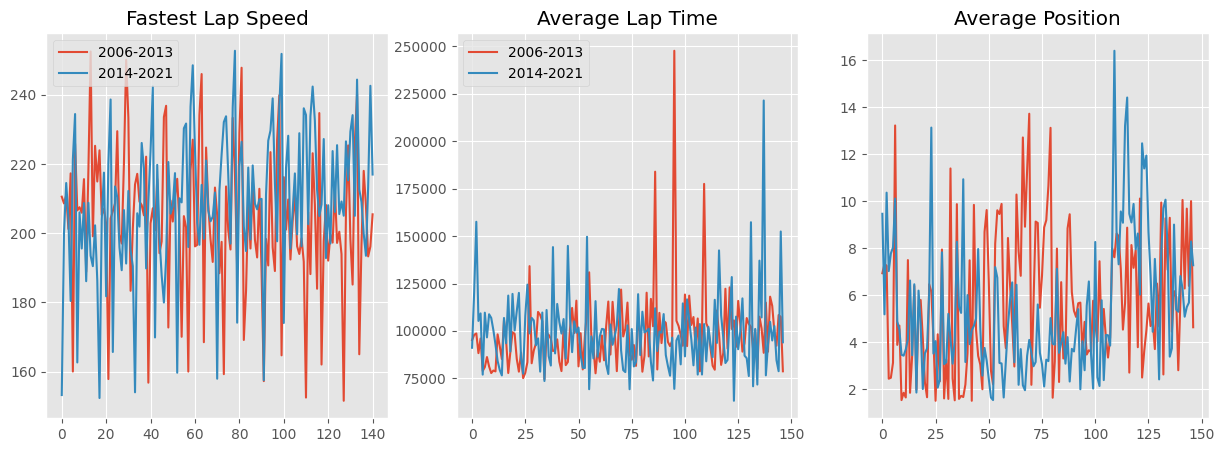

In [ ]:
plt.style.use('ggplot')
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(ferrari_fastest_lap_speedv8, label="2006-2013")
axs[0].plot(ferrari_fastest_lap_speedv6, label="2014-2021")
axs[0].set_title("Fastest Lap Speed")
axs[0].legend()

# Average Lap Time
axs[1].plot(ferrari_avg_lap_timev8, label="2006-2013")
axs[1].plot(ferrari_avg_lap_timev6, label="2014-2021")
axs[1].set_title("Average Lap Time")
axs[1].legend()

# Average Position
axs[2].plot(ferrari_avg_positionv8, label="2006-2013")
axs[2].plot(ferrari_avg_positionv6, label="2014-2021")
axs[2].set_title("Average Position")
axs[2].legend

plt.show()

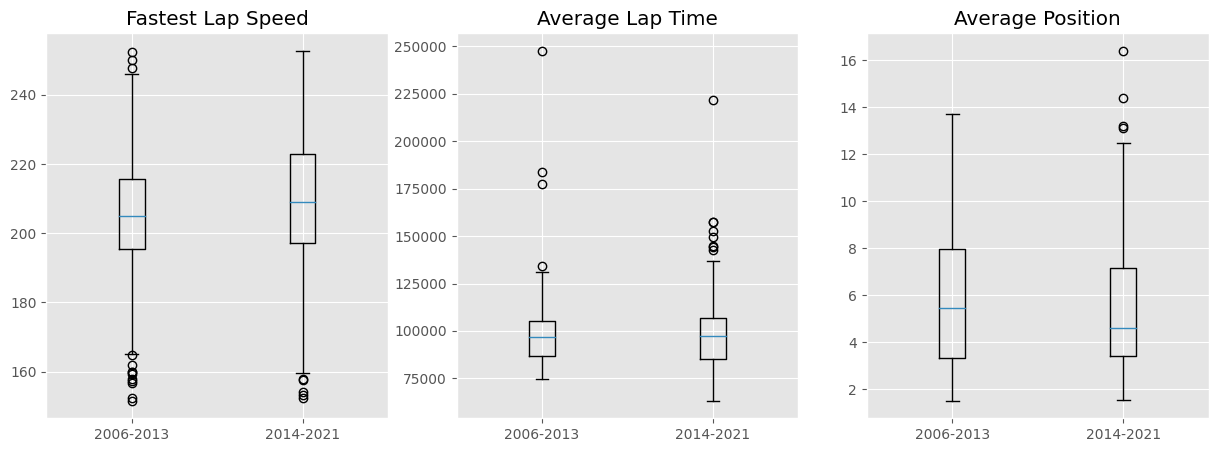

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Fastest Lap Speed
axs[0].boxplot([ferrari_fastest_lap_speedv8, ferrari_fastest_lap_speedv6], labels=["2006-2013", "2014-2021"])
axs[0].set_title("Fastest Lap Speed")

# Average Lap Time
axs[1].boxplot([ferrari_avg_lap_timev8, ferrari_avg_lap_timev6], labels=["2006-2013", "2014-2021"])
axs[1].set_title("Average Lap Time")

# Average Position
axs[2].boxplot([ferrari_avg_positionv8, ferrari_avg_positionv6], labels=["2006-2013", "2014-2021"])
axs[2].set_title("Average Position")

plt.show()

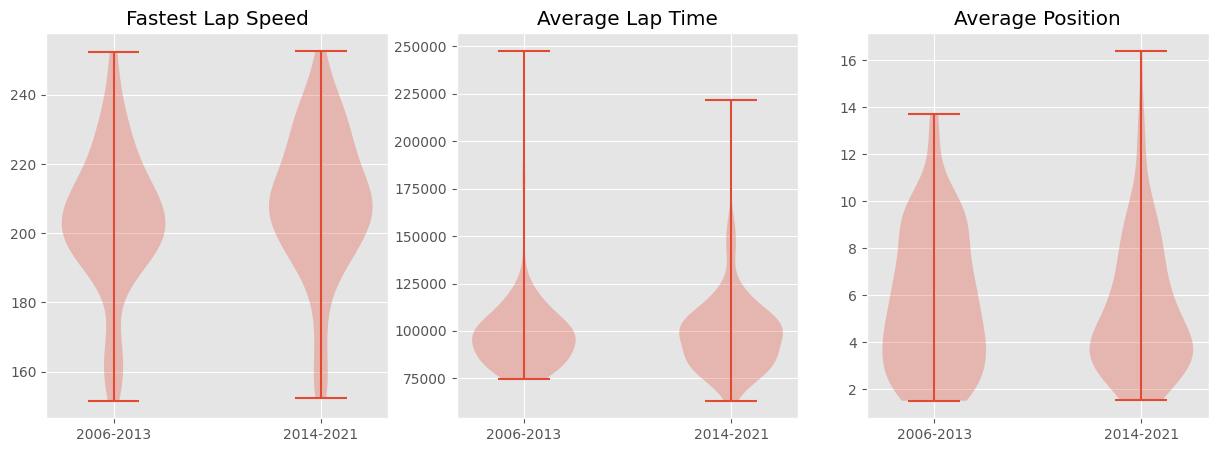

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Fastest Lap Speed
axs[0].violinplot([ferrari_fastest_lap_speedv8, ferrari_fastest_lap_speedv6])
axs[0].set_xticks([1, 2])
axs[0].set_xticklabels(["2006-2013", "2014-2021"])
axs[0].set_title("Fastest Lap Speed")

# Average Lap Time
axs[1].violinplot([ferrari_avg_lap_timev8, ferrari_avg_lap_timev6])
axs[1].set_xticks([1, 2])
axs[1].set_xticklabels(["2006-2013", "2014-2021"])
axs[1].set_title("Average Lap Time")

# Average Position
axs[2].violinplot([ferrari_avg_positionv8, ferrari_avg_positionv6])
axs[2].set_xticks([1, 2])
axs[2].set_xticklabels(["2006-2013", "2014-2021"])
axs[2].set_title("Average Position")

plt.show()

These 3 plots allow us to conclude that the change of engyne didn't have a bad impact on ferrari performances.

They even got better during the V6 era.
For sure, they're othe factors unrelated to the engine type that may cause this amelioration such as the drivers capabilities and the progress of mechanic

### 8.1.2 RedBull

Let's summarize Redbull performances between 2006 to 2013 and 2014 to 2021 and compare them

In [ ]:
Redbullv8 = MRF_fact[(MRF_fact['constructorId'] == 9) & (MRF_fact['seasonId'].between(2006,2013))]
Redbullv8

,seasonId,raceId,constructorId,fastest_laptime,avg_laptime,avg_laptime_milliseconds,slowest_laptime,slowest_laptime_milliseconds,fastest_laptime_milliseconds,best_racePosition,avg_racePosition,worst_racePosition,fastestLapSpeed
3822,2006,53,9,0 days 00:01:33.212000,0 days 00:01:35.743175438,95743.175,0 days 00:02:00.805000,120805,93212,4,8.27,13,209.020
3742,2006,54,9,0 days 00:01:36.867000,0 days 00:02:04.301611111,124301.611,0 days 00:11:16.839000,676839,96867,10,16.89,21,206.002
3792,2006,55,9,0 days 00:01:28.250000,0 days 00:01:42.418491803,102418.492,0 days 00:02:34.825000,154825,88250,9,12.64,15,216.326
3905,2006,56,9,0 days 00:01:26.759000,0 days 00:01:30.917609195,90917.609,0 days 00:02:26.832000,146832,86759,11,14.02,18,205.770
3844,2006,57,9,0 days 00:01:34.553000,0 days 00:01:41.633100,101633.100,0 days 00:02:26.475000,146475,94553,12,13.53,21,196.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,2013,895,9,0 days 00:01:34.587000,0 days 00:01:38.355952830,98355.953,0 days 00:01:57.553000,117553,94587,1,2.17,6,221.015
6642,2013,896,9,0 days 00:01:28.116000,0 days 00:01:31.701454545,91701.455,0 days 00:01:52.178000,112178,88116,1,2.61,17,209.383
6604,2013,897,9,0 days 00:01:43.893000,0 days 00:01:47.300372727,107300.373,0 days 00:02:07.583000,127583,103893,1,2.09,9,192.451
6700,2013,898,9,0 days 00:01:39.856000,0 days 00:01:46.452607142,106452.607,0 days 00:02:41.795000,161795,99856,1,2.12,4,198.754


In [ ]:
Redbullv6 = MRF_fact[(MRF_fact['constructorId'] == 9) & (MRF_fact['seasonId'].between(2014,2021))]
Redbullv6

,seasonId,raceId,constructorId,fastest_laptime,avg_laptime,avg_laptime_milliseconds,slowest_laptime,slowest_laptime_milliseconds,fastest_laptime_milliseconds,best_racePosition,avg_racePosition,worst_racePosition,fastestLapSpeed
6911,2014,900,9,0 days 00:01:33.066000,0 days 00:01:39.093650,99093.650,0 days 00:02:22.548000,142548,93066,2,2.72,16,0.000
6844,2014,901,9,0 days 00:01:44.289000,0 days 00:01:50.219561904,110219.562,0 days 00:03:32.008000,212008,104289,3,4.63,16,191.341
6872,2014,902,9,0 days 00:01:39.269000,0 days 00:01:45.437315789,105437.316,0 days 00:02:26.529000,146529,99269,3,8.19,13,196.266
6974,2014,903,9,0 days 00:01:41.473000,0 days 00:01:44.496517857,104496.518,0 days 00:02:02.581000,122581,101473,2,3.99,5,193.387
6989,2014,904,9,0 days 00:01:28.918000,0 days 00:01:32.848681818,92848.682,0 days 00:01:51.144000,111144,88918,3,6.37,21,188.465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,2021,1069,9,0 days 00:01:39.096000,0 days 00:01:41.743991071,101743.991,0 days 00:02:01.373000,121373,99096,1,2.22,4,200.278
9871,2021,1070,9,0 days 00:01:18.999000,0 days 00:01:23.492422535,83492.423,0 days 00:02:11.575000,131575,78999,1,1.92,3,196.134
10020,2021,1071,9,0 days 00:01:11.010000,0 days 00:01:18.423507042,78423.507,0 days 00:02:29.633000,149633,71010,1,2.33,5,218.453
9893,2021,1072,9,0 days 00:01:31.488000,0 days 00:02:40.693000,160693.000,0 days 00:21:47.869000,1307869,91488,1,2.52,8,242.943


We will summarize the data about the fastest lap speed, the average laptime in milliseconds and the average position



In [ ]:
Redbull_fastest_lap_speedv8 = list(filter(lambda x: x != 0, Redbullv8['fastestLapSpeed']))
print(Redbull_fastest_lap_speedv8)
print(f"{len(Redbull_fastest_lap_speedv8)} elements")

[209.02, 206.002, 216.326, 205.77, 196.004, 213.932, 154.452, 221.086, 202.377, 201.089, 211.87, 180.098, 213.46, 246.595, 196.627, 219.934, 210.48, 218.178, 203.416, 204.26, 200.636, 156.591, 202.267, 205.563, 222.666, 196.496, 194.915, 215.754, 229.119, 184.695, 197.478, 209.076, 207.417, 206.597, 202.969, 219.294, 152.133, 201.057, 204.879, 213.866, 192.043, 194.57, 230.236, 232.544, 169.587, 200.896, 216.596, 204.304, 174.235, 205.614, 201.684, 159.636, 219.314, 229.238, 197.151, 192.498, 196.009, 235.07, 168.479, 225.833, 210.386, 199.387, 189.781, 216.061, 205.605, 191.715, 197.552, 159.91, 215.447, 200.895, 196.774, 230.6, 217.166, 191.491, 230.489, 247.452, 168.879, 223.647, 183.139, 209.493, 196.526, 213.066, 198.415, 198.232, 214.226, 192.262, 157.724, 203.317, 191.536, 221.918, 196.18, 188.389, 229.465, 240.937, 168.029, 215.9, 202.941, 211.463, 205.942, 213.503, 197.539, 195.279, 202.151, 190.935, 152.579, 207.249, 189.923, 223.48, 208.011, 187.453, 221.629, 235.081, 162.86

In [ ]:
Redbull_fastest_lap_speedv6 = list(filter(lambda x: x != 0, Redbullv6['fastestLapSpeed']))
print(Redbull_fastest_lap_speedv6)
print(f"{len(Redbull_fastest_lap_speedv6)} elements")

[191.341, 196.266, 193.387, 188.465, 151.718, 199.638, 213.161, 217.556, 203.676, 182.103, 223.229, 235.413, 162.052, 186.795, 205.133, 195.768, 209.576, 191.341, 190.929, 190.068, 197.348, 183.903, 153.891, 201.153, 217.238, 216.603, 185.939, 223.073, 236.811, 165.701, 212.524, 194.614, 190.001, 203.273, 188.085, 203.633, 194.264, 208.074, 189.98, 153.437, 205.71, 202.021, 226.459, 220.882, 186.407, 209.918, 224.205, 242.726, 170.113, 204.925, 218.877, 193.77, 190.972, 181.846, 190.624, 219.525, 202.886, 208.387, 213.888, 158.577, 206.126, 206.048, 233.878, 234.445, 250.174, 211.235, 223.122, 202.394, 196.4, 218.349, 195.969, 222.128, 204.871, 204.999, 213.638, 161.772, 212.547, 223.083, 230.491, 231.551, 217.085, 197.115, 235.767, 249.432, 176.753, 218.655, 224.336, 202.011, 195.67, 217.434, 197.477, 221.327, 204.46, 207.126, 206.221, 210.081, 161.73, 209.98, 223.351, 230.378, 237.561, 214.839, 204.552, 250.83, 173.298, 217.573, 225.332, 195.328, 202.458, 218.909, 197.731, 227.156, 2

We will use the 138 last races of the V6 era

In [ ]:
Redbull_fastest_lap_speedv6 = Redbull_fastest_lap_speedv6[-138:]
print(f"{len(Redbull_fastest_lap_speedv6)} elements")

138 elements


In [ ]:
Redbull_avg_lap_timev8 = Redbullv8['avg_laptime_milliseconds'].tolist()
print(f"{len(Redbull_avg_lap_timev8)} elements")

147 elements


In [ ]:
Redbull_avg_lap_timev6 = Redbullv6['avg_laptime_milliseconds'].tolist()
print(f"{len(Redbull_avg_lap_timev6)} elements")

160 elements


In [ ]:
#We take the 147 last races
Redbull_avg_lap_timev6 = Redbull_avg_lap_timev6[-147:]
print(f"{len(Redbull_avg_lap_timev6)} elements")

147 elements


In [ ]:
Redbull_avg_positionv8 = Redbullv8['avg_racePosition'].tolist()
print(f"{len(Redbull_avg_positionv8)} elements")

147 elements


In [ ]:
Redbull_avg_positionv6 = Redbullv6['avg_racePosition'].tolist()
Redbull_avg_positionv6 = Redbull_avg_positionv6[-147:]
print(f"{len(Redbull_avg_positionv8)} elements")

147 elements


We create the subplots

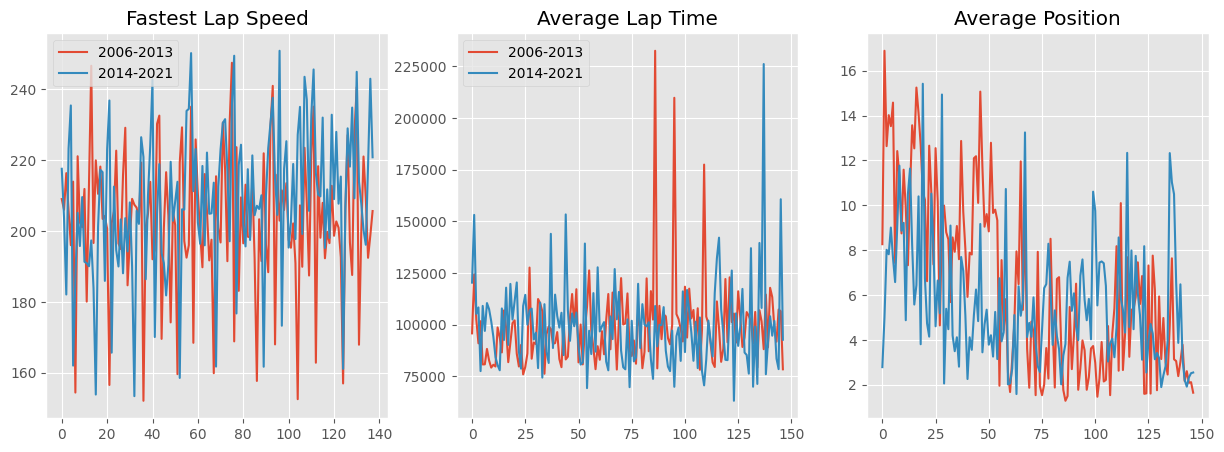

In [ ]:
plt.style.use('ggplot')
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(Redbull_fastest_lap_speedv8, label="2006-2013")
axs[0].plot(Redbull_fastest_lap_speedv6, label="2014-2021")
axs[0].set_title("Fastest Lap Speed")
axs[0].legend()

# Average Lap Time
axs[1].plot(Redbull_avg_lap_timev8, label="2006-2013")
axs[1].plot(Redbull_avg_lap_timev6, label="2014-2021")
axs[1].set_title("Average Lap Time")
axs[1].legend()

# Average Position
axs[2].plot(Redbull_avg_positionv8, label="2006-2013")
axs[2].plot(Redbull_avg_positionv6, label="2014-2021")
axs[2].set_title("Average Position")
axs[2].legend

plt.show()

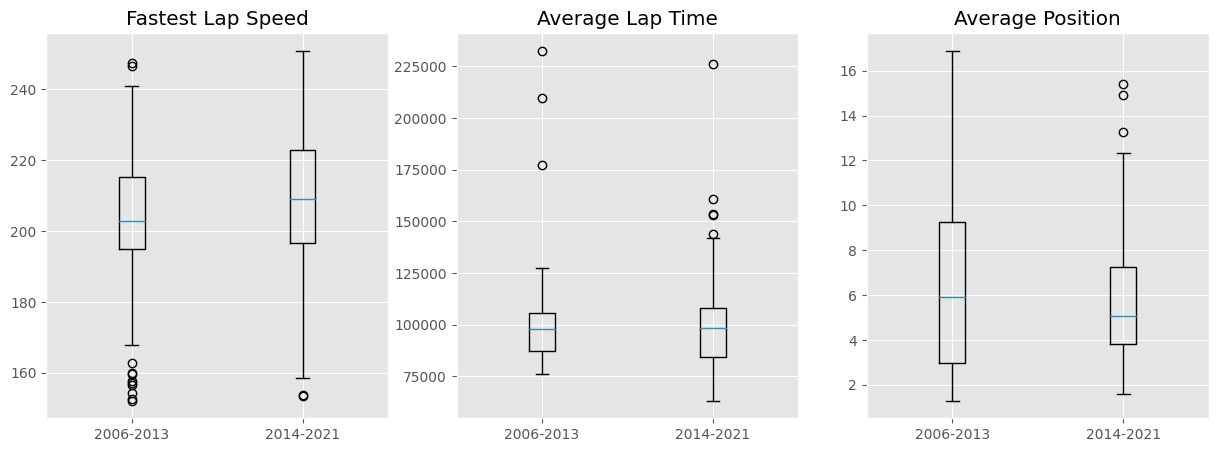

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Fastest Lap Speed
axs[0].boxplot([Redbull_fastest_lap_speedv8, Redbull_fastest_lap_speedv6], labels=["2006-2013", "2014-2021"])
axs[0].set_title("Fastest Lap Speed")

# Average Lap Time
axs[1].boxplot([Redbull_avg_lap_timev8, Redbull_avg_lap_timev6], labels=["2006-2013", "2014-2021"])
axs[1].set_title("Average Lap Time")

# Average Position
axs[2].boxplot([Redbull_avg_positionv8, Redbull_avg_positionv6], labels=["2006-2013", "2014-2021"])
axs[2].set_title("Average Position")

plt.show()

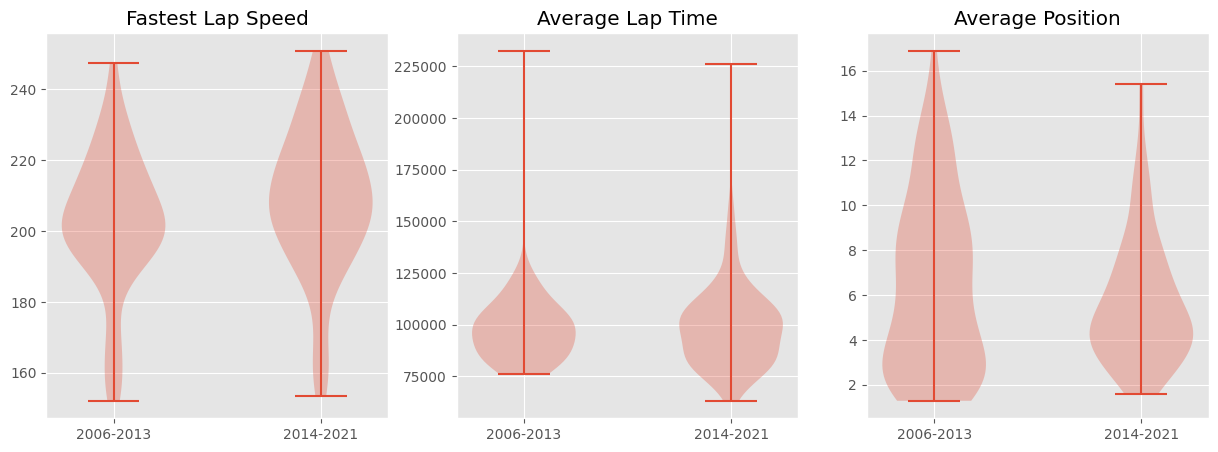

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Fastest Lap Speed
axs[0].violinplot([Redbull_fastest_lap_speedv8, Redbull_fastest_lap_speedv6])
axs[0].set_xticks([1, 2])
axs[0].set_xticklabels(["2006-2013", "2014-2021"])
axs[0].set_title("Fastest Lap Speed")

# Average Lap Time
axs[1].violinplot([Redbull_avg_lap_timev8, Redbull_avg_lap_timev6])
axs[1].set_xticks([1, 2])
axs[1].set_xticklabels(["2006-2013", "2014-2021"])
axs[1].set_title("Average Lap Time")

# Average Position
axs[2].violinplot([Redbull_avg_positionv8, Redbull_avg_positionv6])
axs[2].set_xticks([1, 2])
axs[2].set_xticklabels(["2006-2013", "2014-2021"])
axs[2].set_title("Average Position")

plt.show()

### 8.1.3 McLaren

Let's summarize McLaren performances between 2006 to 2013 and 2014 to 2021 and compare them

In [ ]:
Mclarenv8 = MRF_fact[(MRF_fact['constructorId'] == 1) & (MRF_fact['seasonId'].between(2006,2013))]
Mclarenv8

,seasonId,raceId,constructorId,fastest_laptime,avg_laptime,avg_laptime_milliseconds,slowest_laptime,slowest_laptime_milliseconds,fastest_laptime_milliseconds,best_racePosition,avg_racePosition,worst_racePosition,fastestLapSpeed
3831,2006,53,1,0 days 00:01:32.771000,0 days 00:01:34.989631578,94989.632,0 days 00:01:59.836000,119836,92771,1,4.96,13,210.013
3757,2006,54,1,0 days 00:01:35.566000,0 days 00:01:37.855000,97855.000,0 days 00:01:58.014000,118014,95566,3,4.32,6,0.000
3748,2006,55,1,0 days 00:01:26.045000,0 days 00:01:42.230097087,102230.097,0 days 00:03:50.664000,230664,86045,1,3.41,13,221.869
3771,2006,56,1,0 days 00:01:25.027000,0 days 00:01:28.438419354,88438.419,0 days 00:02:29.503000,149503,85027,1,5.51,10,209.961
3838,2006,57,1,0 days 00:01:32.472000,0 days 00:01:36.791392857,96791.393,0 days 00:02:32.643000,152643,92472,1,6.02,11,200.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6776,2013,895,1,0 days 00:01:35.549000,0 days 00:01:40.157942857,100157.943,0 days 00:02:01.961000,121961,95549,5,10.95,17,218.790
6640,2013,896,1,0 days 00:01:28.503000,0 days 00:01:32.368336134,92368.336,0 days 00:01:51.946000,111946,88503,2,10.56,19,208.467
6614,2013,897,1,0 days 00:01:45.435000,0 days 00:01:48.792518181,108792.518,0 days 00:02:14.807000,134807,105435,9,13.82,21,189.637
6639,2013,898,1,0 days 00:01:41.285000,0 days 00:01:47.484517857,107484.518,0 days 00:02:42.710000,162710,101285,6,10.12,16,195.950


In [ ]:
Mclarenv6 = MRF_fact[(MRF_fact['constructorId'] == 1) & (MRF_fact['seasonId'].between(2014,2021))]
Mclarenv6

,seasonId,raceId,constructorId,fastest_laptime,avg_laptime,avg_laptime_milliseconds,slowest_laptime,slowest_laptime_milliseconds,fastest_laptime_milliseconds,best_racePosition,avg_racePosition,worst_racePosition,fastestLapSpeed
6919,2014,900,1,0 days 00:01:32.917000,0 days 00:01:38.370385964,98370.386,0 days 00:02:20.764000,140764,92917,2,4.59,11,205.460
6839,2014,901,1,0 days 00:01:45.373000,0 days 00:01:49.351621621,109351.622,0 days 00:02:19.142000,139142,105373,5,8.57,17,189.372
6832,2014,902,1,0 days 00:01:39.565000,0 days 00:01:45.400600,105400.600,0 days 00:02:32.570000,152570,99565,3,9.12,16,195.683
6957,2014,903,1,0 days 00:01:42.701000,0 days 00:01:46.098218181,106098.218,0 days 00:02:03.409000,123409,102701,9,13.02,21,191.075
6991,2014,904,1,0 days 00:01:30.318000,0 days 00:01:33.812238461,93812.238,0 days 00:01:53.184000,113184,90318,7,12.21,16,185.544
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9972,2021,1069,1,0 days 00:01:40.228000,0 days 00:01:42.806723214,102806.723,0 days 00:02:03.844000,123844,100228,5,6.39,11,198.016
10029,2021,1070,1,0 days 00:01:20.617000,0 days 00:01:25.187764285,85187.764,0 days 00:02:20.003000,140003,80617,7,11.50,18,192.197
10025,2021,1071,1,0 days 00:01:13.761000,0 days 00:01:20.288831932,80288.832,0 days 00:02:17.097000,137097,73761,4,11.12,20,210.306
9892,2021,1072,1,0 days 00:01:31.914000,0 days 00:02:32.517150,152517.150,0 days 00:21:47.962000,1307962,91914,4,8.03,16,241.817


We will summarize the data about the fastest lap speed, the average laptime in milliseconds and the average position



In [ ]:
Mclaren_fastest_lap_speedv8 = list(filter(lambda x: x != 0, Mclarenv8['fastestLapSpeed']))
print(Mclaren_fastest_lap_speedv8)
print(f"{len(Mclaren_fastest_lap_speedv8)} elements")

[210.013, 221.869, 209.961, 200.415, 215.328, 159.628, 224.44, 207.006, 204.568, 215.317, 187.055, 252.604, 197.92, 223.958, 211.683, 221.178, 206.355, 206.674, 202.205, 159.715, 205.58, 206.101, 207.59, 228.159, 198.783, 196.724, 218.464, 251.653, 233.073, 186.259, 200.259, 213.946, 218.385, 209.033, 209.062, 204.323, 222.085, 155.586, 202.559, 205.87, 199.398, 216.552, 193.533, 197.285, 233.175, 232.44, 171.969, 207.257, 203.722, 209.177, 171.361, 205.269, 199.883, 158.896, 216.986, 224.557, 194.331, 191.219, 196.943, 245.923, 168.561, 224.162, 208.772, 199.212, 189.665, 215.7, 204.151, 192.273, 198.655, 89.54, 213.769, 201.778, 197.521, 228.633, 215.385, 187.3, 231.178, 166.462, 223.515, 183.048, 210.049, 197.428, 212.396, 197.057, 195.424, 213.264, 193.227, 157.252, 204.007, 190.623, 220.499, 196.526, 188.517, 229.092, 241.971, 168.392, 216.481, 201.216, 209.737, 193.83, 205.244, 214.053, 196.523, 195.411, 199.351, 189.09, 152.577, 203.837, 187.568, 220.714, 207.205, 184.082, 235.8

In [ ]:
Mclaren_fastest_lap_speedv6 = list(filter(lambda x: x != 0, Mclarenv6['fastestLapSpeed']))
print(Mclaren_fastest_lap_speedv6)
print(f"{len(Mclaren_fastest_lap_speedv6)} elements")

[205.46, 189.372, 195.683, 191.075, 185.544, 149.075, 199.337, 214.081, 215.778, 205.255, 177.442, 222.186, 233.68, 163.33, 187.119, 206.472, 190.367, 209.629, 187.32, 188.153, 189.183, 183.826, 151.128, 199.092, 180.637, 221.778, 233.575, 164.023, 209.862, 205.115, 192.638, 203.252, 190.793, 208.223, 202.694, 195.652, 209.799, 186.718, 151.739, 203.081, 200.802, 222.476, 221.676, 185.639, 206.395, 244.373, 163.902, 203.017, 215.124, 191.752, 185.189, 178.338, 191.343, 213.448, 197.23, 199.752, 156.697, 206.974, 205.488, 226.906, 196.697, 229.415, 242.861, 170.855, 208.012, 223.05, 197.777, 191.355, 193.41, 219.54, 206.898, 201.818, 201.126, 207.588, 156.291, 207.214, 221.071, 226.399, 226.862, 212.368, 192.125, 246.79, 176.677, 211.394, 222.53, 198.636, 189.138, 213.542, 195.271, 215.581, 203.829, 201.263, 205.047, 207.249, 158.295, 205.301, 222.408, 228.207, 236.596, 211.538, 194.706, 248.141, 172.412, 214.78, 223.434, 192.929, 202.365, 214.472, 197.389, 230.378, 236.894, 197.28, 235

We will use the 144 last races of the V6 era

In [ ]:
Mclaren_fastest_lap_speedv6 = Mclaren_fastest_lap_speedv6[-144:]
print(f"{len(Mclaren_fastest_lap_speedv6)} elements")

144 elements


In [ ]:
Mclaren_avg_lap_timev8 = Mclarenv8['avg_laptime_milliseconds'].tolist()
print(f"{len(Mclaren_avg_lap_timev8)} elements")

146 elements


In [ ]:
Mclaren_avg_lap_timev6 = Mclarenv6['avg_laptime_milliseconds'].tolist()
print(f"{len(Mclaren_avg_lap_timev6)} elements")

160 elements


In [ ]:
#We take the 147 last races
Mclaren_avg_lap_timev6 = Mclaren_avg_lap_timev6[-147:]
print(f"{len(Mclaren_avg_lap_timev6)} elements")

147 elements


In [ ]:
Mclaren_avg_positionv8 = Mclarenv8['avg_racePosition'].tolist()
print(f"{len(Mclaren_avg_positionv8)} elements")

146 elements


In [ ]:
Mclaren_avg_positionv6 = Mclarenv6['avg_racePosition'].tolist()
Mclaren_avg_positionv6 = Mclaren_avg_positionv6[-147:]
print(f"{len(Mclaren_avg_positionv8)} elements")

146 elements


We will create the subplots

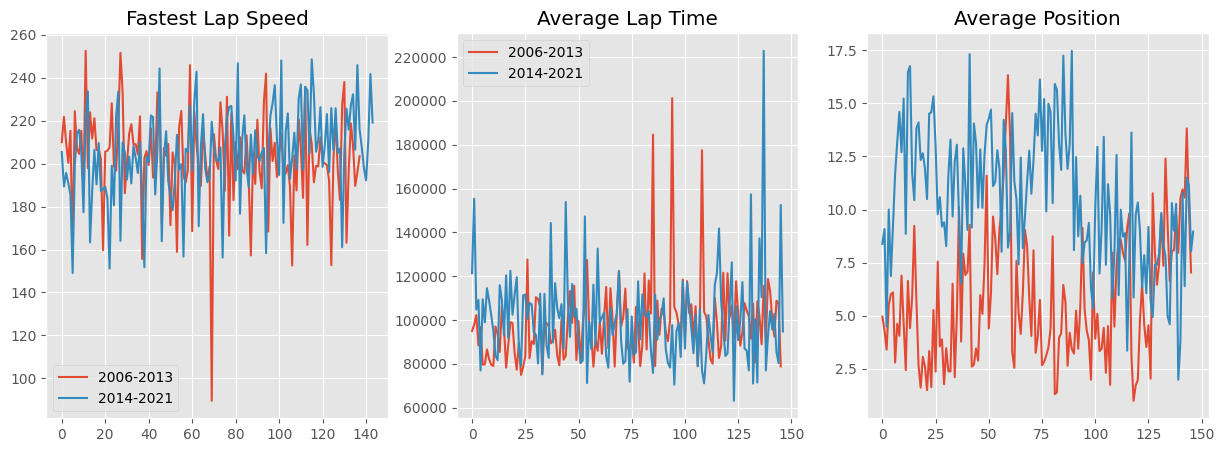

In [ ]:
plt.style.use('ggplot')
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(Mclaren_fastest_lap_speedv8, label="2006-2013")
axs[0].plot(Mclaren_fastest_lap_speedv6, label="2014-2021")
axs[0].set_title("Fastest Lap Speed")
axs[0].legend()

# Average Lap Time
axs[1].plot(Mclaren_avg_lap_timev8, label="2006-2013")
axs[1].plot(Mclaren_avg_lap_timev6, label="2014-2021")
axs[1].set_title("Average Lap Time")
axs[1].legend()

# Average Position
axs[2].plot(Mclaren_avg_positionv8, label="2006-2013")
axs[2].plot(Mclaren_avg_positionv6, label="2014-2021")
axs[2].set_title("Average Position")
axs[2].legend

plt.show()

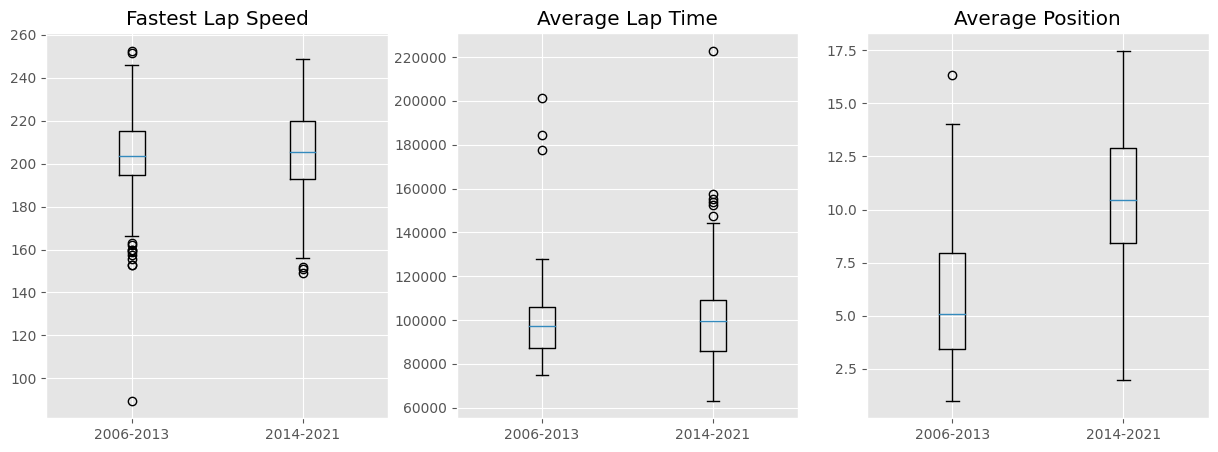

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Fastest Lap Speed
axs[0].boxplot([Mclaren_fastest_lap_speedv8, Mclaren_fastest_lap_speedv6], labels=["2006-2013", "2014-2021"])
axs[0].set_title("Fastest Lap Speed")

# Average Lap Time
axs[1].boxplot([Mclaren_avg_lap_timev8, Mclaren_avg_lap_timev6], labels=["2006-2013", "2014-2021"])
axs[1].set_title("Average Lap Time")

# Average Position
axs[2].boxplot([Mclaren_avg_positionv8, Mclaren_avg_positionv6], labels=["2006-2013", "2014-2021"])
axs[2].set_title("Average Position")

plt.show()

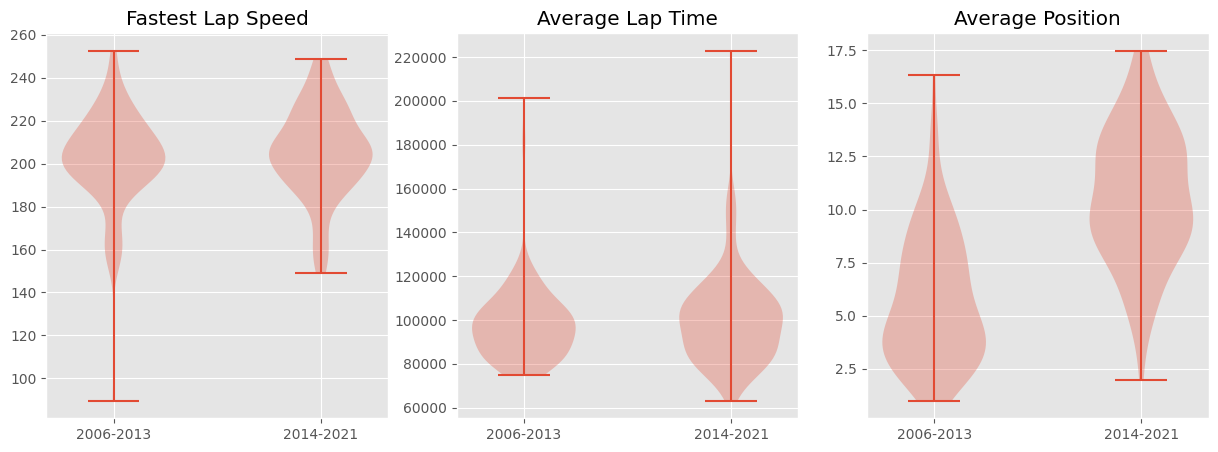

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Fastest Lap Speed
axs[0].violinplot([Mclaren_fastest_lap_speedv8, Mclaren_fastest_lap_speedv6])
axs[0].set_xticks([1, 2])
axs[0].set_xticklabels(["2006-2013", "2014-2021"])
axs[0].set_title("Fastest Lap Speed")

# Average Lap Time
axs[1].violinplot([Mclaren_avg_lap_timev8, Mclaren_avg_lap_timev6])
axs[1].set_xticks([1, 2])
axs[1].set_xticklabels(["2006-2013", "2014-2021"])
axs[1].set_title("Average Lap Time")

# Average Position
axs[2].violinplot([Mclaren_avg_positionv8, Mclaren_avg_positionv6])
axs[2].set_xticks([1, 2])
axs[2].set_xticklabels(["2006-2013", "2014-2021"])
axs[2].set_title("Average Position")

plt.show()

These 3 plots allow us to conclude that the engine regulation change did not have that much of an impact on Redbull performance, we can only notice that they improved their performance based on their position because we can see in the third graph that there are more chance that Redbull is positioned 8 or above in 2014 to 2021 than the period of 2006 and 2014.

We can say that their performance were even better after the new regulation.